In [ ]:
'''
각 음료를 몇번 먹는지도 클러스터링에 추가
주로 뭘 먹는 사람이 어떤 사람이구나 체크
어떤 사람이 주로 뭘 먹는 사람이냐를 체크
다같이 때려넣고 클러스터링 하니까 이렇게 묶이더라
해석하기에 용이한 클러스터링 다 해봐
클러스터링 robust하게 만들기

끝까지 연결되는 것이 핵심이 클러스터이기 때문!

해시태그 - 한정적
친환경 어필(유럽) -> 우리나라는? MZ에게 먹힌다? 데이터로 보여줘야 한다.
근거!!!!!!!!!!!!!!!!

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import font_manager, rc

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv('설문조사_최종데이터.csv', encoding = 'cp949') ; df

,타임스탬프,"귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)",귀하의 성별은 무엇인가요?,귀하는 어떤 일을 하십니까?,귀하가 함께 거주하는 사람은 누구인가요?,귀하의 취미는 무엇인가요?,다음 중 귀하가 선호하는 음료는 무엇인가요? (최대 2개 선택),"신제품이나 트렌디한 음료를 대체로 경험해보시나요? (ex 버블티, 아샷추, 달고나 커피 등)",평소 본인의 업무량(학업량)이 많다고 생각하십니까?,평소 음식/음료를 섭취할 때 건강을 고려하는 편인가요?,...,해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택).4,과채음료를 일주일에 몇 회 마시나요?,과채음료를 주로 언제 마시나요? (최대 2개 선택),과채음료를 마실 때 기대하는 요인은 무엇인가요? (복수선택),과채음료를 마실 때 우려하는 요인은 무엇인가요? (복수 선택),과채음료를 주로 구매하는 구매처는 어디인가요? (최대 2개 선택),과채음료와 주로 함께 먹는 음식은 무엇인가요?,다음 중 가장 선호하는 과채음료 제품은 무엇인가요?,해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택).5,당첨시 상품 수령을 위한 휴대폰 번호를 입력해주세요(ex / 010-1234-5678)
0,2020. 9. 29 오후 12:51:48,26,남,학생,가족,독서,"탄산음료, 에너지음료",관심만 가진다.,그렇다.,그렇지 않다.,...,NaN,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020. 9. 29 오후 1:20:33,22,남,학생,가족,문화생활,탄산음료,관심만 가진다.,매우 그렇지 않다.,그렇다.,...,NaN,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083353792
2,2020. 9. 29 오후 1:42:40,23,남,학생,가족,운동/스포츠,"커피, 이온/스포츠음료",대체로 경험해보는 편이다.,보통이다.,그렇지 않다.,...,NaN,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020. 9. 29 오후 1:43:26,25,여,학생,가족,SNS,"탄산음료, 탄산수",대체로 경험해보는 편이다.,보통이다.,그렇다.,...,맛이 좋아서,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1031916631
4,2020. 9. 29 오후 1:47:47,22,남,학생,가족,독서,"커피, 과채음료",관심 없다.,그렇다.,그렇지 않다.,...,NaN,1~2회,취침 전,맛,당분,"편의점, 마트",음료만 섭취,미닛메이드_주스류,제품 인지도가 높아서,010-3633-3114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2020. 10. 14 오후 2:16:05,26,남,학생,1인 가구,운동/스포츠,"커피, 탄산음료",관심 없다.,그렇다.,그렇다.,...,NaN,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010-3233-8867
368,2020. 10. 14 오후 2:18:25,24,남,학생,가족,기타,과채음료,관심 없다.,보통이다.,매우 그렇다.,...,NaN,1~2회,"공복 시, 업무/공부 할 때","맛, 건강, 갈증해소","당분, 치아 부식, 합성 첨가물, 기타","편의점, 카페",음료만 섭취,기타,기타,1036083926
369,2020. 10. 14 오후 3:21:15,32,남,프리랜서,가족,그림그리기/만들기,"커피, 탄산음료",항상 경험해본다.,매우 그렇지 않다.,매우 그렇지 않다.,...,NaN,거의 마시지 않음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010-5016-3736
370,2020. 10. 14 오후 3:27:18,32,남,프리랜서,가족,게임,"탄산음료, 과채음료",관심 없다.,그렇지 않다.,그렇지 않다.,...,NaN,3~5회,공복 시,건강,당분,"편의점, 마트",음료만 섭취,자연은_주스류,맛이 좋아서,NaN


In [4]:
column_info = df.columns

df.columns = ["Q"+str(i) for i in range(len(column_info))]

In [5]:
# 질문번호와 질문내용
for i, j in enumerate(column_info):
    print('Q'+str(i), j)

Q0 타임스탬프
Q1 귀하의 나이는 어떻게 되시나요? (ex : 20, 25, 35 ...)
Q2 귀하의 성별은 무엇인가요?
Q3 귀하는 어떤 일을 하십니까?
Q4 귀하가 함께 거주하는 사람은 누구인가요?
Q5 귀하의 취미는 무엇인가요?
Q6 다음 중 귀하가 선호하는 음료는 무엇인가요? (최대 2개 선택)
Q7 신제품이나 트렌디한 음료를 대체로 경험해보시나요? (ex 버블티, 아샷추, 달고나 커피 등)
Q8 평소 본인의 업무량(학업량)이 많다고 생각하십니까?
Q9 평소 음식/음료를 섭취할 때 건강을 고려하는 편인가요?
Q10 커피를 일주일에 몇 회 마시나요?
Q11 커피를 주로 언제 마시나요? (최대 2개 선택)
Q12 커피를 마실 때 기대하는 요인은 무엇인가요? (복수선택)
Q13 커피를 마실 때 우려하는 요인은 무엇인가요? (복수 선택)
Q14 커피를 주로 구매하는 구매처는 어디인가요? (최대 2개 선택)
Q15 커피와 주로 함께 먹는 음식은 무엇인가요?
Q16 다음 중 가장 선호하는 커피 제품은 무엇인가요?
Q17 해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택)
Q18 차를 일주일에 몇 회 마시나요?
Q19 차를 주로 언제 마시나요? (최대 2개 선택)
Q20 차를 마실 때 기대하는 요인은 무엇인가요? (복수선택)
Q21 차를 마실 때 우려하는 요인은 무엇인가요? (복수 선택)
Q22 차를 주로 구매하는 구매처는 어디인가요? (최대 2개 선택)
Q23 차와 주로 함께 먹는 음식은 무엇인가요?
Q24 다음 중 가장 선호하는 차 제품은 무엇인가요?
Q25 해당 제품을 선호하는 이유는 무엇인가요? (최대 3개 선택).1
Q26 탄산음료를 일주일에 몇 회 마시나요?
Q27 탄산음료를 주로 언제 마시나요? (최대 2개 선택)
Q28 탄산음료를 마실 때 기대하는 요인은 무엇인가요? (복수선택)
Q29 탄산음료를 마실 때 우려하는 요인은 무엇인가요? (복수 선택)
Q30 탄산음료를 주로 구매하는 구매처는 어디인가요? (최대 2개 선택)
Q31 탄산음료와 

In [6]:
df['연령대'] = df.Q1.apply(lambda x :  '20대' if x < 30 else(
                         '30대' if x < 40 else(
                         '40대' if x < 50 else(
                         '50대' if x < 60 else '60대'))))

In [7]:
df['MZ세대'] = df.연령대.apply(lambda x :'MZ' if x == '20대' or x == '30대' else 'not_MZ')

In [8]:
import prince
def plot_mca(X = None, var_list = None, n = 2, title = 'a'):
    if n == 2:
        input_X = X[var_list]
        mca = prince.MCA(n_components=n).fit(input_X)

        # 시각화
        ax = mca.plot_coordinates(X = input_X, figsize=(15, 15), row_points_size = 0, column_points_size = 100, show_column_labels=True)
        ax.set_title(title, fontsize = 24)
    if n == 3:
        input_X = X[var_list]
        mca = prince.MCA(n_components=n).fit(input_X)

        fig = plt.figure(figsize = (12, 12))
        ax = mca.plot_coordinates(X = input_X, ax = fig.add_subplot(projection='3d'), show_column_labels=True)
        ax.set_title(title, fontsize = 10)
    else:
        return None

In [9]:
# 분류별로 묶기
df_info = pd.concat([df.loc[:, 'Q1':'Q9'], df[['연령대','MZ세대']]], axis = 1)
coffee = df.loc[:, 'Q10':'Q17']
tea = df.loc[:, 'Q18':'Q25']
soda = df.loc[:, 'Q26':'Q33']
energy = df.loc[:, 'Q34':'Q41']
ion = df.loc[:, 'Q42':'Q49']
water = df.loc[:,'Q50':'Q57']
juice =df.loc[:, 'Q58':'Q65']

# 상응분석을 위한 전처리
## 결측치 제거
coffee_dropna = coffee.dropna()
tea_dropna = tea.dropna()
soda_dropna = soda.dropna()
energy_dropna = energy.dropna()
ion_dropna = ion.dropna()
water_dropna = water.dropna()
juice_dropna = juice.dropna()

## reset columns
coffee_dropna.columns = range(coffee_dropna.shape[1])
tea_dropna.columns = range(tea_dropna.shape[1])
soda_dropna.columns = range(soda_dropna.shape[1])
energy_dropna.columns = range(energy_dropna.shape[1])
ion_dropna.columns = range(ion_dropna.shape[1])
water_dropna.columns = range(water_dropna.shape[1])
juice_dropna.columns = range(juice_dropna.shape[1])

## 라벨링
coffee_dropna['LABEL'] = 'coffee'
tea_dropna['LABEL'] = 'tea'
soda_dropna['LABEL'] = 'soda'
energy_dropna['LABEL'] = 'energy'
ion_dropna['LABEL'] = 'ion'
water_dropna['LABEL'] = 'water'
juice_dropna['LABEL'] = 'juice'

## concat
correspondence_df = pd.concat([coffee_dropna, tea_dropna, soda_dropna, energy_dropna, ion_dropna, water_dropna, juice_dropna], ignore_index = True)

correspondence_df.head()

,0,1,2,3,4,5,6,7,LABEL
0,3~5회,"공복 시, 업무/공부 할 때","맛, 각성효과, 갈증해소",당분,"편의점, 카페",디저트,스타벅스,맛이 좋아서,coffee
1,3~5회,"운동 전후, 업무/공부 할 때","맛, 각성효과",없음,"편의점, 카페",음료만 섭취,조지아 크래프트,가격이 저렴해서 (행사 상품이어서),coffee
2,3~5회,업무/공부 할 때,"맛, 각성효과",카페인,"인터넷, 카페",음료만 섭취,칸타타 콘트라베이스,제품 인지도가 높아서,coffee
3,1~2회,업무/공부 할 때,"각성효과, 갈증해소",카페인,카페,디저트,스타벅스,맛이 좋아서,coffee
4,12회 이상,"업무/공부 할 때, 친목 활동 시","맛, 피로회복, 갈증해소",카페인,카페,음료만 섭취,맥심 TOP,맛이 좋아서,coffee


In [10]:
corr = df_info.iloc[:, 1:]

In [11]:
f1 = pd.get_dummies(corr.Q2)

In [12]:
f2 = pd.get_dummies(corr.Q3)

In [13]:
f3 = pd.get_dummies(corr.Q4)

In [14]:
f4 = pd.get_dummies(corr.Q5)

In [15]:
f5= pd.get_dummies(corr.Q6)

In [16]:
f6 = pd.get_dummies(corr.Q7)

In [17]:
f7 = pd.get_dummies(corr.Q8)

In [18]:
f8 = pd.get_dummies(corr.Q9)

In [19]:
from sklearn.decomposition import PCA

def pca_df(df, n = None):
    if n == None:
        max_col = df.shape[1] # 차원축소하려는 데이터의 column의 개수
        pca = PCA(n_components=max_col, random_state=0).fit(df)

        cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량을 누적합
        num_col = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수

        # 차원축소
        pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
        pca_f = pd.DataFrame(pca)
        return pca_f
    
    else:
        pca = PCA(n_components = n, random_state = 0).fit_transform(df)
        pca_f = pd.DataFrame(pca)
        return pca_f

In [20]:
f1 = pca_df(f1)
f2 = pca_df(f2)
f3 = pca_df(f3)
f4 = pca_df(f4)
f5 = pca_df(f5)
f6 = pca_df(f6)
f7 = pca_df(f7)
f8 = pca_df(f8)

In [21]:
fe = pd.DataFrame()
fe_list = [
    f1, 
    f2, 
    f3, 
    f4, 
    f5, 
    f6, 
    f7, 
    f8]
for i in fe_list:
    fe = pd.concat([fe, i], ignore_index = True, axis = 1)

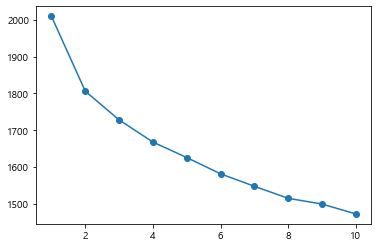

In [22]:
from sklearn.cluster import KMeans

def elbow(x):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, algorithm = 'auto', random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.show()
    
elbow(fe)

In [23]:
k = 4
model = KMeans(n_clusters = k, algorithm = 'auto', random_state = 0)
model.fit(fe)
pred = pd.DataFrame(model.predict(fe))
pred.columns = ['predict']

In [24]:
final_df = pd.DataFrame(np.hstack((pred, fe)))

In [25]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components = n_components, random_state = 0)

transformed = tsne.fit_transform(fe)

In [26]:
def show_tsne(n_components = 2):
    if n_components == 2:
        xs = transformed[:, 0]
        ys = transformed[:, 1]
        plt.scatter(xs, ys, c = final_df.iloc[:, 0])
        plt.show()
    elif n_components == 3:
        ax = fig.add_subplot(111, projection = '3d')
        xs = transformed[:, 0]
        ys = transformed[:, 1]
        zs = transformed[:, 2]
        ax.scatter(xs, ys, zs,  c = final_df.iloc[:, 0])
        plt.show()
    else : return False

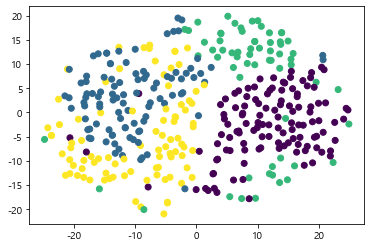

In [27]:
show_tsne(n_components)

# 군집 특성 파악

In [28]:
def percentage_pivot(df, columns, index, values, aggfunc = len, fill_value = 0):
    f = pd.pivot_table(df, columns = columns, index = index, values = values, aggfunc = aggfunc, fill_value = fill_value, margins = True)
    f2 = f.div(f.iloc[:, -1], axis = 0)
    return f2.iloc[:-1, :-1]

In [29]:
temp = pd.concat([df_info, pred], axis = 1 )#; temp

In [30]:
### 나이 ###
pd.pivot_table(temp, index = 'predict', values = 'Q1',aggfunc = np.mean, fill_value = 0)

,Q1
predict,
0,29.159664
1,21.979798
2,26.906250
3,40.733333


In [31]:
### 남녀비율 ###

pd.pivot_table(temp, index = 'predict', columns = 'Q2', values = 'Q1', aggfunc = len, fill_value = 0)

Q2,남,여
predict,,
0,119,0
1,0,99
2,45,19
3,0,90


In [32]:
### 직업 ###
pd.pivot_table(temp, index = 'predict', columns = 'Q3', values = 'Q1', aggfunc = len, fill_value = 0)

Q3,군인,무직,자영업,주부,직장인,취준생,프리랜서,학생
predict,,,,,,,,
0,4,3,6,0,25,9,6,66
1,0,0,0,0,0,1,0,98
2,3,2,1,1,9,1,4,43
3,0,1,8,19,45,9,8,0


In [33]:
### 주거형태 ###
pd.pivot_table(temp, index = 'predict', columns = 'Q4', values = 'Q1', aggfunc = len, fill_value = 0)
#percentage_pivot(temp, index = 'predict', columns = 'Q4', values = 'Q1', aggfunc = len, fill_value = 0)

Q4,1인 가구,가족,기타,친구/지인
predict,,,,
0,0,115,1,3
1,10,83,2,4
2,57,0,1,6
3,6,84,0,0


In [34]:
'''
Q1, Q2, Q3, Q4로 보아,
군집_0 : 가족과 사는 남성
군집_1 : 학생 여성
군집_2 : 홀로 사는 사람
군집_3 : 직장인/주부 여성

으로 나뉘는 듯 하다.
'''

'\nQ1, Q2, Q3, Q4로 보아,\n군집_0 : 가족과 사는 남성\n군집_1 : 학생 여성\n군집_2 : 홀로 사는 사람\n군집_3 : 직장인/주부 여성\n\n으로 나뉘는 듯 하다.\n'

In [35]:
### 취미 ###
#pd.pivot_table(temp, index = 'predict', columns = 'Q5', values = 'Q1',aggfunc = len, fill_value = 0)
percentage_pivot(temp, index = 'predict', columns = 'Q5', values = 'Q1',aggfunc = len, fill_value = 0)

Q5,SNS,게임,그림그리기/만들기,기타,독서,문화생활,사교모임,운동/스포츠,음악감상/악기연주
predict,,,,,,,,,
0,0.016807,0.117647,0.016807,0.033613,0.075630,0.184874,0.067227,0.445378,0.042017
1,0.252525,0.040404,0.040404,0.040404,0.040404,0.282828,0.090909,0.181818,0.030303
2,0.031250,0.046875,0.015625,0.015625,0.140625,0.046875,0.046875,0.562500,0.093750
3,0.122222,0.033333,0.044444,0.111111,0.077778,0.255556,0.133333,0.166667,0.055556


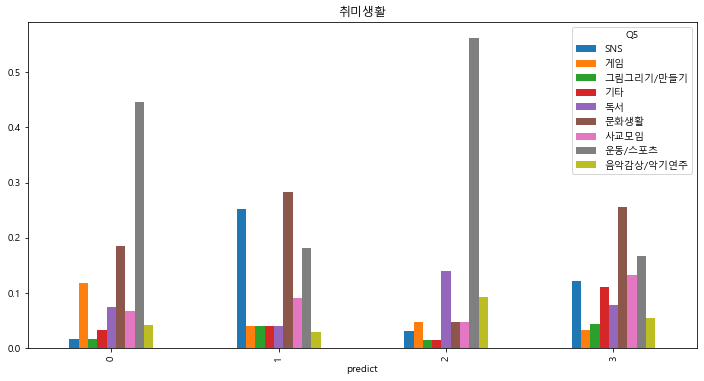

In [36]:
percentage_pivot(temp, index = 'predict', columns = 'Q5', values = 'Q1',aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
plt.title('취미생활')
plt.show()

In [37]:
'''
군집 0, 2에서 운동/스포츠의 강세가 돋보임.
군집 2에서 문화생활의 약세가 돋보임.
군집 0에서 게임의 강세가 돋보임.
군집 1, 3에서 SNS, 문화생활, 사교모임의 강세가 돋보임.
'''

'\n군집 0, 2에서 운동/스포츠의 강세가 돋보임.\n군집 2에서 문화생활의 약세가 돋보임.\n군집 0에서 게임의 강세가 돋보임.\n군집 1, 3에서 SNS, 문화생활, 사교모임의 강세가 돋보임.\n'

In [38]:
### 선호음료 ###
# 복수응답문제 해결해야 함.
percentage_pivot(temp, index = 'predict', columns = 'Q6', values = 'Q1',aggfunc = len, fill_value = 0)

Q6,과채음료,"과채음료, 기타","과채음료, 이온/스포츠음료","과채음료, 탄산수",기타,에너지음료,"에너지음료, 기타","에너지음료, 이온/스포츠음료",이온/스포츠음료,"이온/스포츠음료, 탄산수",...,"커피, 이온/스포츠음료","커피, 차","커피, 탄산수","커피, 탄산음료",탄산음료,"탄산음료, 과채음료","탄산음료, 기타","탄산음료, 에너지음료","탄산음료, 이온/스포츠음료","탄산음료, 탄산수"
predict,,,,,,,,,,,,,,,,,,,,,
0,0.025210,0.00000,0.042017,0.000000,0.000000,0.000000,0.000000,0.008403,0.042017,0.000000,...,0.109244,0.067227,0.058824,0.218487,0.042017,0.033613,0.008403,0.033613,0.058824,0.008403
1,0.020202,0.00000,0.050505,0.010101,0.010101,0.000000,0.010101,0.000000,0.010101,0.000000,...,0.060606,0.070707,0.040404,0.191919,0.010101,0.101010,0.010101,0.010101,0.040404,0.040404
2,0.015625,0.03125,0.000000,0.000000,0.015625,0.015625,0.000000,0.031250,0.031250,0.015625,...,0.078125,0.031250,0.046875,0.218750,0.015625,0.031250,0.000000,0.000000,0.078125,0.015625
3,0.011111,0.00000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,...,0.055556,0.177778,0.077778,0.088889,0.000000,0.055556,0.011111,0.000000,0.000000,0.000000


In [39]:
### 신제품 관심도 ###
#pd.pivot_table(temp, index = 'predict', columns = 'Q7', values = 'Q1',aggfunc = len, fill_value = 0)
percentage_pivot(temp, index = 'predict', columns = 'Q7', values = 'Q1',aggfunc = len, fill_value = 0)#.plot(kind = 'bar')

Q7,관심 없다.,관심만 가진다.,대체로 경험해보는 편이다.,항상 경험해본다.
predict,,,,
0,0.243697,0.310924,0.369748,0.075630
1,0.070707,0.282828,0.434343,0.212121
2,0.187500,0.375000,0.390625,0.046875
3,0.111111,0.355556,0.466667,0.066667


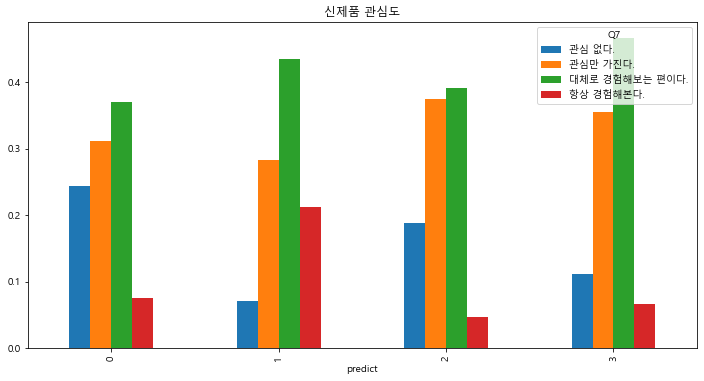

In [40]:
percentage_pivot(temp, index = 'predict', columns = 'Q7', values = 'Q1',aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
plt.title('신제품 관심도')
plt.show()

In [41]:
'''
군집 1은 특히 관심없다의 비율이 낮고, 항상 경험해본다의 비율이 높음.
군집 0, 2는 관심없다/관심만 가진다의 비율이 높음.
'''

'\n군집 1은 특히 관심없다의 비율이 낮고, 항상 경험해본다의 비율이 높음.\n군집 0, 2는 관심없다/관심만 가진다의 비율이 높음.\n'

In [42]:
### 체감 업무량 ###
#pd.pivot_table(temp, index = 'predict', columns = 'Q8', values = 'Q1',aggfunc = len, fill_value = 0)
percentage_pivot(temp, index = 'predict', columns = 'Q8', values = 'Q1',aggfunc = len, fill_value = 0)

Q8,그렇다.,그렇지 않다.,매우 그렇다.,매우 그렇지 않다.,보통이다.
predict,,,,,
0,0.319328,0.126050,0.134454,0.050420,0.369748
1,0.282828,0.090909,0.151515,0.020202,0.454545
2,0.328125,0.062500,0.218750,0.031250,0.359375
3,0.266667,0.111111,0.222222,0.000000,0.400000


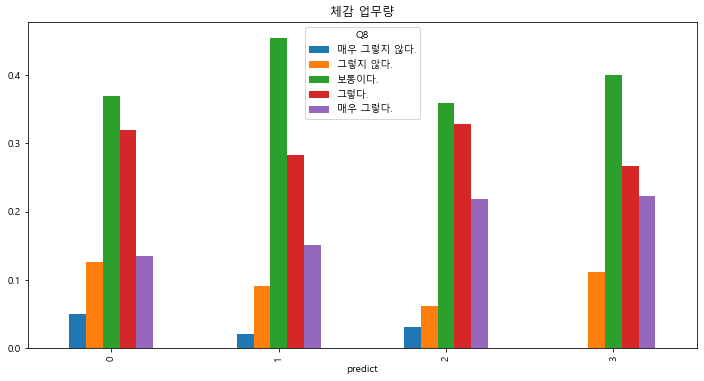

In [43]:
kk = percentage_pivot(temp, index = 'predict', columns = 'Q8', values = 'Q1',aggfunc = len, fill_value = 0)
kk = kk[['매우 그렇지 않다.','그렇지 않다.','보통이다.','그렇다.','매우 그렇다.']]
kk.plot(kind = 'bar', figsize = (12, 6))
plt.title('체감 업무량')
plt.show()

In [44]:
'''
군집 2, 3의 체감업무량 비율이 높음.
'''

'\n군집 2, 3의 체감업무량 비율이 높음.\n'

In [45]:
### 건강 관심도 ###
#pd.pivot_table(temp, index = 'predict', columns = 'Q9', values = 'Q1',aggfunc = len, fill_value = 0)
percentage_pivot(temp, index = 'predict', columns = 'Q9', values = 'Q1',aggfunc = len, fill_value = 0)

Q9,그렇다.,그렇지 않다.,매우 그렇다.,매우 그렇지 않다.,보통이다.
predict,,,,,
0,0.226891,0.294118,0.100840,0.117647,0.260504
1,0.161616,0.363636,0.060606,0.111111,0.303030
2,0.406250,0.187500,0.109375,0.078125,0.218750
3,0.333333,0.133333,0.177778,0.033333,0.322222


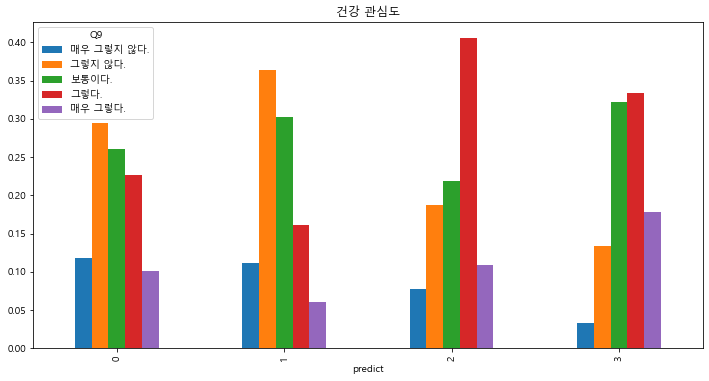

In [46]:
kk = percentage_pivot(temp, index = 'predict', columns = 'Q9', values = 'Q1',aggfunc = len, fill_value = 0)
kk = kk[['매우 그렇지 않다.','그렇지 않다.','보통이다.','그렇다.','매우 그렇다.']]
kk.plot(kind = 'bar', figsize = (12, 6))
plt.title('건강 관심도')
plt.show()

In [47]:
'''
군집 2, 3의 건강관심도가 특히 높음.
반면, 군집 0, 1은 건강관심도가 그리 높진 않음.
'''

'\n군집 2, 3의 건강관심도가 특히 높음.\n반면, 군집 0, 1은 건강관심도가 그리 높진 않음.\n'

In [48]:
### 연령대 ###
pd.pivot_table(temp, index = 'predict', columns = '연령대', values = 'Q1', aggfunc = len, fill_value = 0)

연령대,20대,30대,40대,50대,60대
predict,,,,,
0,84,16,7,12,0
1,99,0,0,0,0
2,51,8,3,2,0
3,28,13,14,34,1


In [49]:
### MZ세대 ###
pd.pivot_table(temp, index = 'predict', columns = 'MZ세대', values = 'Q1', aggfunc = len, fill_value = 0)

MZ세대,MZ,not_MZ
predict,,
0,100,19
1,99,0
2,59,5
3,41,49


# -----------

In [50]:
# 분류별로 묶기

df_info = pd.concat([df.loc[:, 'Q1':'Q9'], df[['연령대','MZ세대']]], axis = 1)
cluster = temp['predict']

coffee = pd.concat([df.loc[:, 'Q10':'Q17'], cluster], axis = 1)
tea = pd.concat([df.loc[:, 'Q18':'Q25'], cluster], axis = 1)
soda = pd.concat([df.loc[:, 'Q26':'Q33'], cluster], axis = 1)
energy = pd.concat([df.loc[:, 'Q34':'Q41'], cluster], axis = 1)
ion = pd.concat([df.loc[:, 'Q42':'Q49'], cluster], axis = 1)
water = pd.concat([df.loc[:,'Q50':'Q57'], cluster], axis = 1)
juice = pd.concat([df.loc[:, 'Q58':'Q65'], cluster], axis = 1)

In [51]:
df_info
#cluster

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,연령대,MZ세대
0,26,남,학생,가족,독서,"탄산음료, 에너지음료",관심만 가진다.,그렇다.,그렇지 않다.,20대,MZ
1,22,남,학생,가족,문화생활,탄산음료,관심만 가진다.,매우 그렇지 않다.,그렇다.,20대,MZ
2,23,남,학생,가족,운동/스포츠,"커피, 이온/스포츠음료",대체로 경험해보는 편이다.,보통이다.,그렇지 않다.,20대,MZ
3,25,여,학생,가족,SNS,"탄산음료, 탄산수",대체로 경험해보는 편이다.,보통이다.,그렇다.,20대,MZ
4,22,남,학생,가족,독서,"커피, 과채음료",관심 없다.,그렇다.,그렇지 않다.,20대,MZ
...,...,...,...,...,...,...,...,...,...,...,...
367,26,남,학생,1인 가구,운동/스포츠,"커피, 탄산음료",관심 없다.,그렇다.,그렇다.,20대,MZ
368,24,남,학생,가족,기타,과채음료,관심 없다.,보통이다.,매우 그렇다.,20대,MZ
369,32,남,프리랜서,가족,그림그리기/만들기,"커피, 탄산음료",항상 경험해본다.,매우 그렇지 않다.,매우 그렇지 않다.,30대,MZ
370,32,남,프리랜서,가족,게임,"탄산음료, 과채음료",관심 없다.,그렇지 않다.,그렇지 않다.,30대,MZ


In [52]:
# 상응분석을 위한 전처리
## 결측치 제거
coffee_dropna = coffee.dropna()
tea_dropna = tea.dropna()
soda_dropna = soda.dropna()
energy_dropna = energy.dropna()
ion_dropna = ion.dropna()
water_dropna = water.dropna()
juice_dropna = juice.dropna()

## reset columns
coffee_dropna.columns = range(coffee_dropna.shape[1])
tea_dropna.columns = range(tea_dropna.shape[1])
soda_dropna.columns = range(soda_dropna.shape[1])
energy_dropna.columns = range(energy_dropna.shape[1])
ion_dropna.columns = range(ion_dropna.shape[1])
water_dropna.columns = range(water_dropna.shape[1])
juice_dropna.columns = range(juice_dropna.shape[1])

## 라벨링
coffee_dropna['LABEL'] = 'coffee'
tea_dropna['LABEL'] = 'tea'
soda_dropna['LABEL'] = 'soda'
energy_dropna['LABEL'] = 'energy'
ion_dropna['LABEL'] = 'ion'
water_dropna['LABEL'] = 'water'
juice_dropna['LABEL'] = 'juice'

## concat
correspondence_df = pd.concat([coffee_dropna, tea_dropna, soda_dropna, energy_dropna, ion_dropna, water_dropna, juice_dropna], ignore_index = True)

In [53]:
correspondence_df

,0,1,2,3,4,5,6,7,8,LABEL
0,3~5회,"공복 시, 업무/공부 할 때","맛, 각성효과, 갈증해소",당분,"편의점, 카페",디저트,스타벅스,맛이 좋아서,0,coffee
1,3~5회,"운동 전후, 업무/공부 할 때","맛, 각성효과",없음,"편의점, 카페",음료만 섭취,조지아 크래프트,가격이 저렴해서 (행사 상품이어서),0,coffee
2,3~5회,업무/공부 할 때,"맛, 각성효과",카페인,"인터넷, 카페",음료만 섭취,칸타타 콘트라베이스,제품 인지도가 높아서,0,coffee
3,1~2회,업무/공부 할 때,"각성효과, 갈증해소",카페인,카페,디저트,스타벅스,맛이 좋아서,2,coffee
4,12회 이상,"업무/공부 할 때, 친목 활동 시","맛, 피로회복, 갈증해소",카페인,카페,음료만 섭취,맥심 TOP,맛이 좋아서,0,coffee
...,...,...,...,...,...,...,...,...,...,...
1129,3~5회,"식사 시, 업무/공부 할 때","맛, 갈증해소",칼로리,카페,음료만 섭취,델몬트_주스류,"맛이 좋아서, 제품 인지도가 높아서",1,juice
1130,1~2회,식사 시,맛,기타,마트,디저트,미닛메이드_주스류,맛이 좋아서,1,juice
1131,3~5회,"운동 전후, 공복 시","맛, 건강, 다이어트",칼로리,"편의점, 마트",음료만 섭취,기타,"가격이 저렴해서 (행사 상품이어서), 성분이 좋아서, 칼로리가 타 제품에 비해 낮아서",0,juice
1132,1~2회,"공복 시, 업무/공부 할 때","맛, 건강, 갈증해소","당분, 치아 부식, 합성 첨가물, 기타","편의점, 카페",음료만 섭취,기타,기타,0,juice


----- 횟수 coffee -----

군집
0    96
1    73
2    45
3    79
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

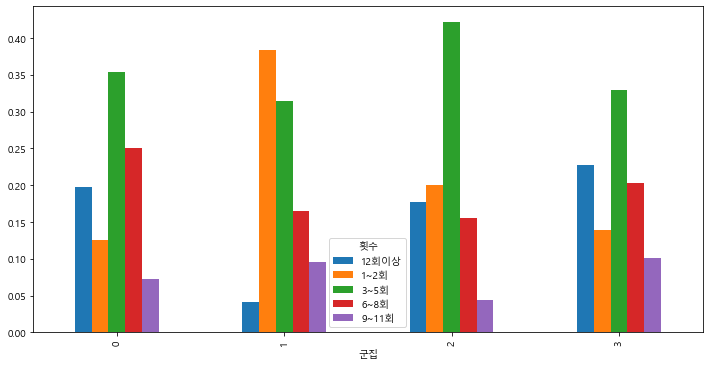


----- 상황 coffee -----

군집
0    161
1    129
2     70
3    127
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

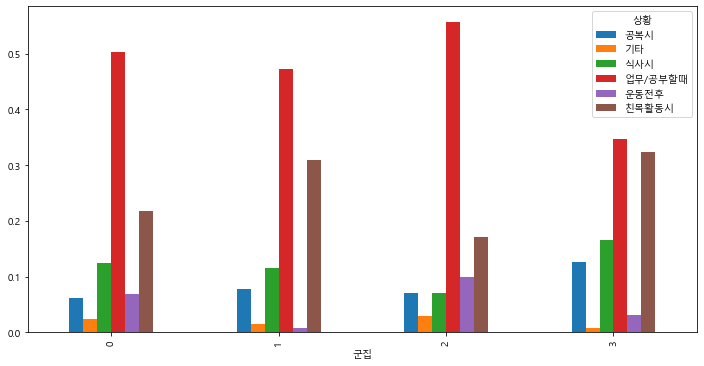


----- 기대효과 coffee -----

군집
0    188
1    149
2     89
3    146
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

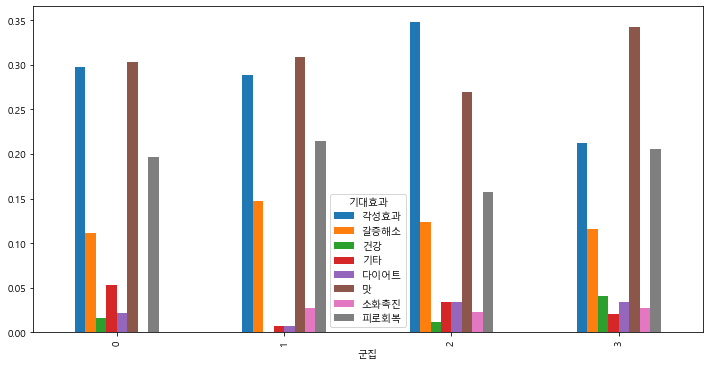


----- 우려요인 coffee -----

군집
0    143
1    118
2     73
3    124
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

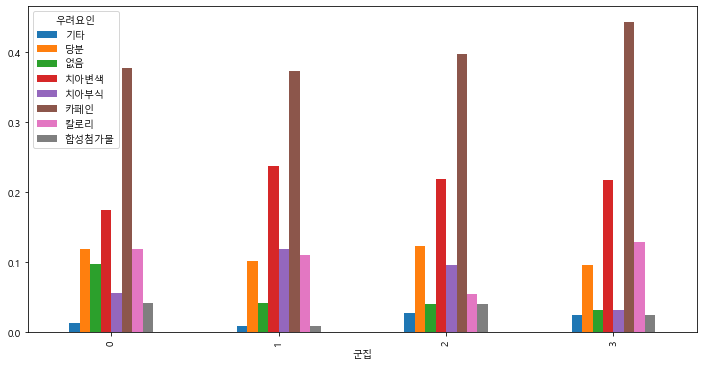


----- 구매장소 coffee -----

군집
0    162
1    122
2     66
3    124
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

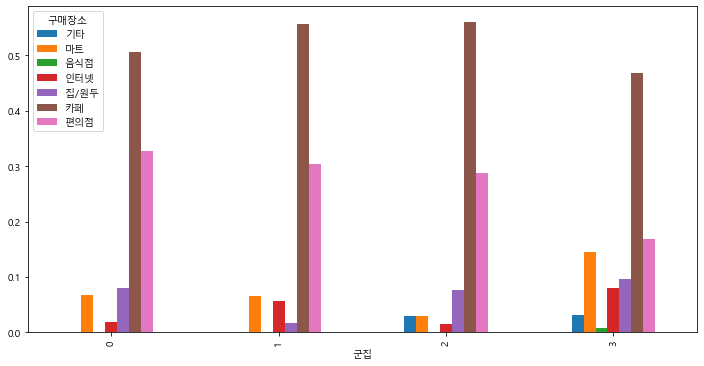


----- 함께음식 coffee -----

군집
0    96
1    73
2    45
3    79
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

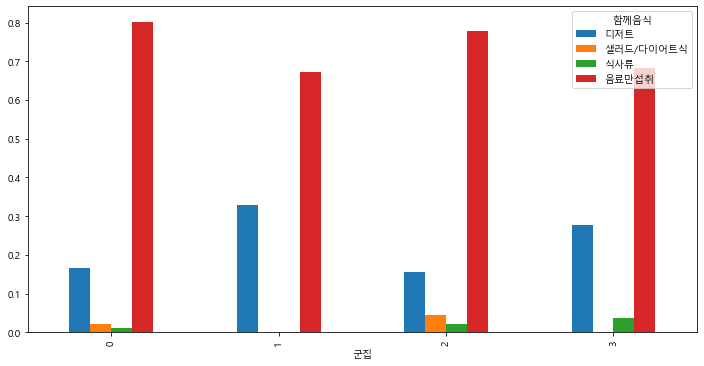


----- 구매사유 coffee -----

군집
0    136
1    125
2     62
3    125
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

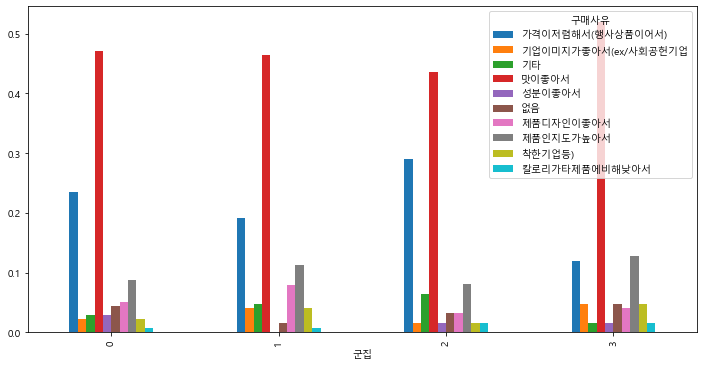


----- 횟수 tea -----

군집
0    54
1    46
2    29
3    59
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

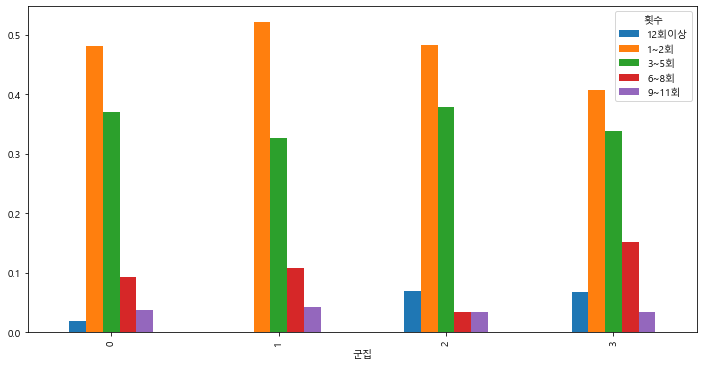


----- 상황 tea -----

군집
0    74
1    76
2    44
3    87
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

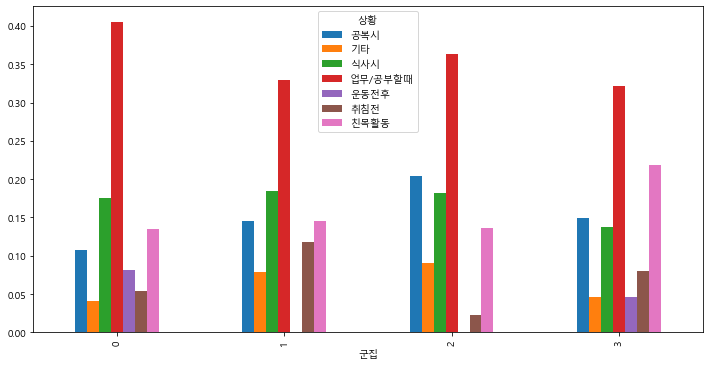


----- 기대효과 tea -----

군집
0     94
1    105
2     58
3     99
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

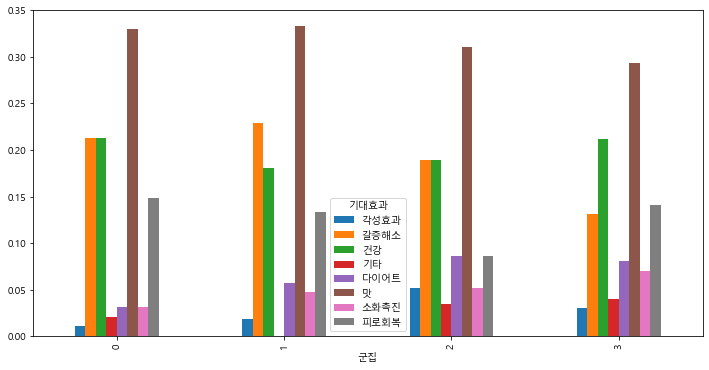


----- 우려요인 tea -----

군집
0    62
1    52
2    34
3    77
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

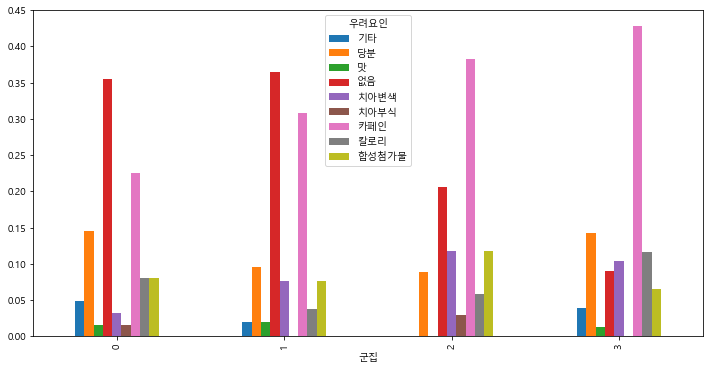


----- 구매장소 tea -----

군집
0    74
1    72
2    39
3    87
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

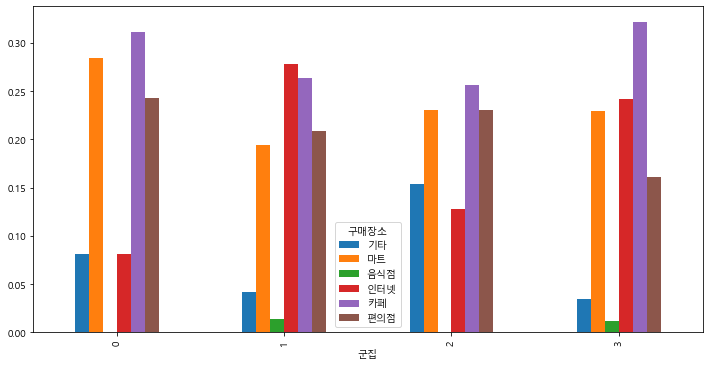


----- 함께음식 tea -----

군집
0    54
1    46
2    29
3    59
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

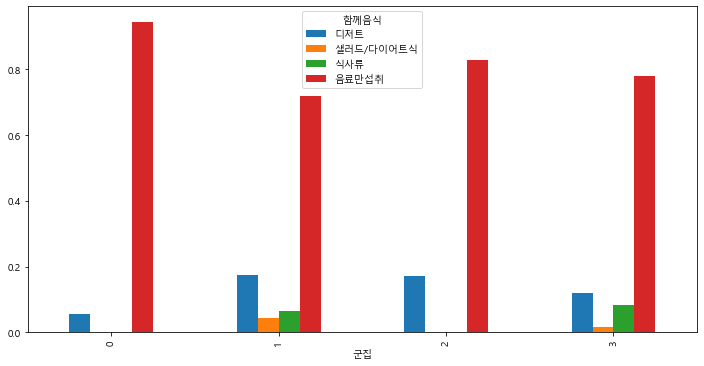


----- 구매사유 tea -----

군집
0    78
1    66
2    43
3    91
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

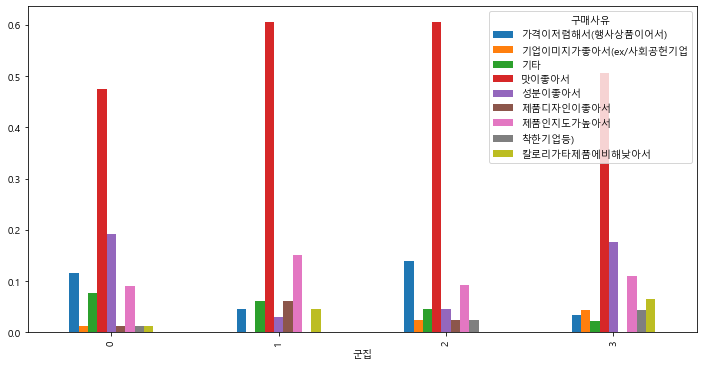


----- 횟수 soda -----

군집
0    85
1    68
2    48
3    44
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

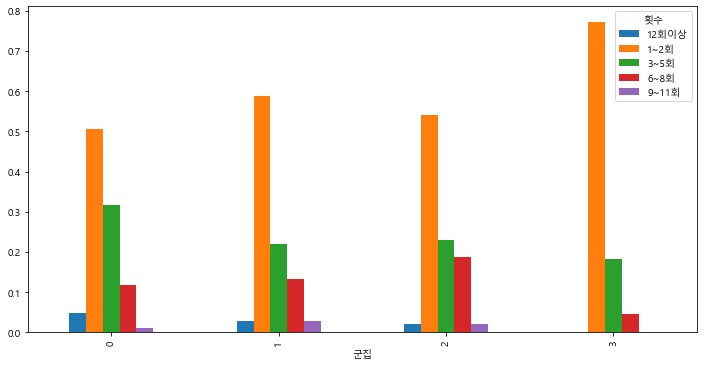


----- 상황 soda -----

군집
0    108
1     85
2     62
3     55
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

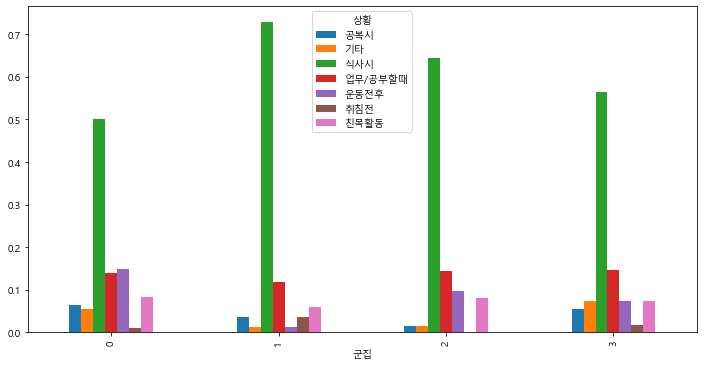


----- 기대효과 soda -----

군집
0    130
1    111
2     79
3     67
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

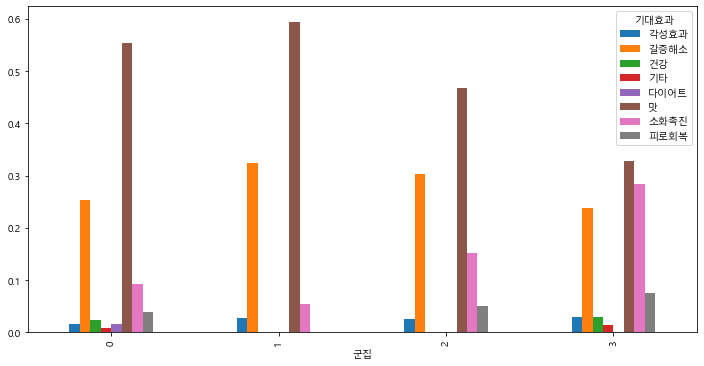


----- 우려요인 soda -----

군집
0    166
1    153
2     99
3     78
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

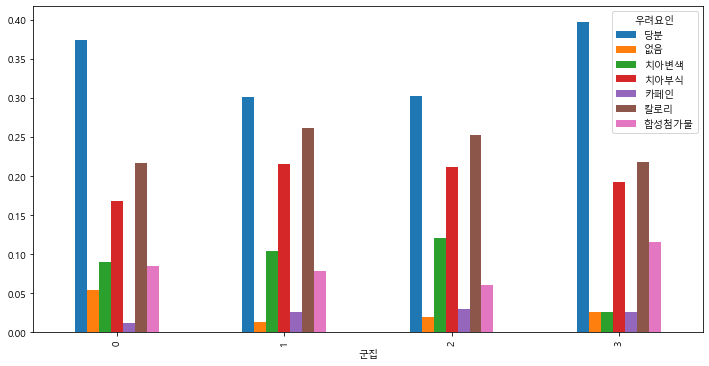


----- 구매장소 soda -----

군집
0    146
1    115
2     72
3     66
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

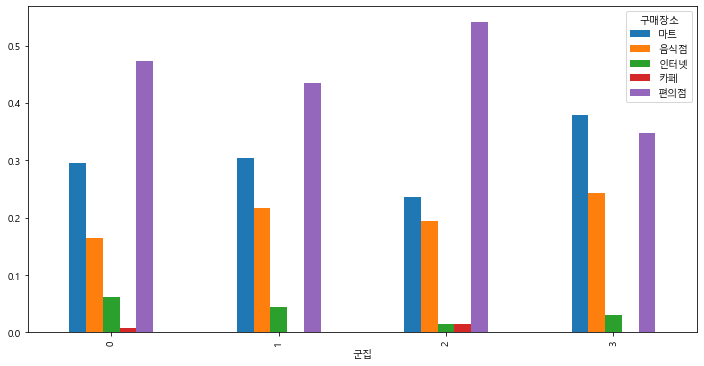


----- 함께음식 soda -----

군집
0    85
1    68
2    48
3    44
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

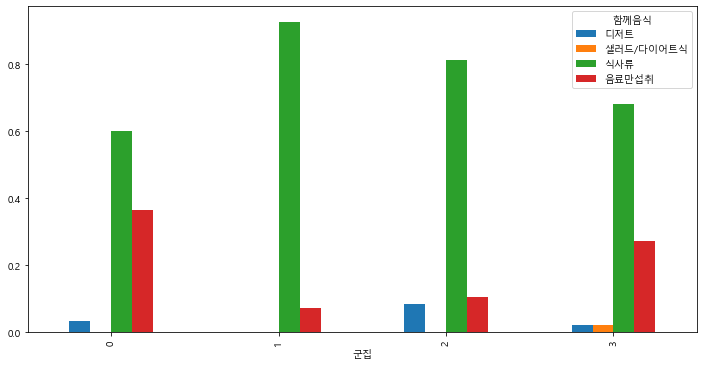


----- 구매사유 soda -----

군집
0    119
1     87
2     73
3     57
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

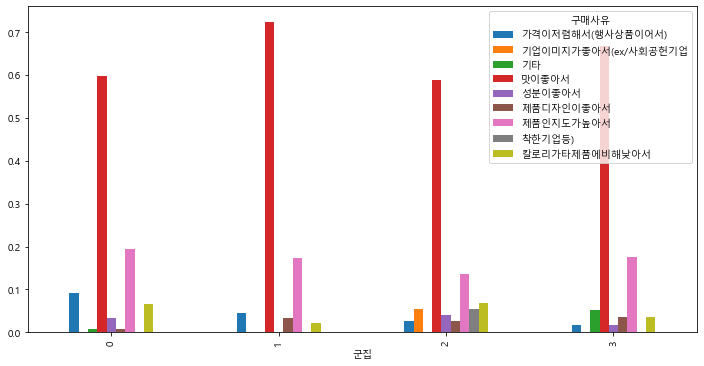


----- 횟수 energy -----

군집
0    29
1    11
2    19
3    12
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

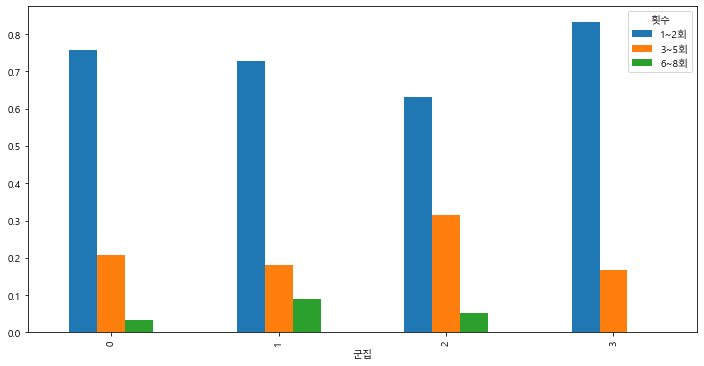


----- 상황 energy -----

군집
0    34
1    13
2    23
3    14
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

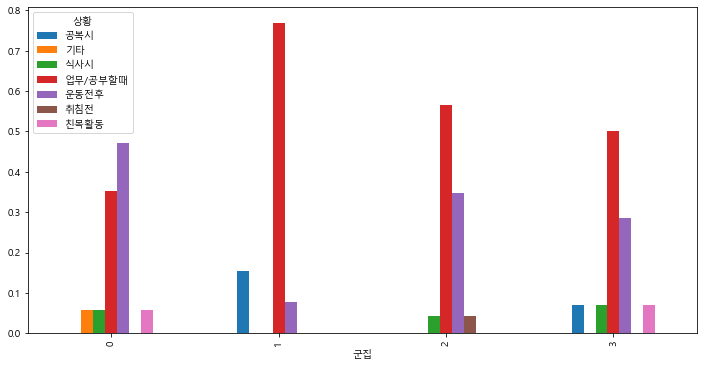


----- 기대효과 energy -----

군집
0    49
1    20
2    36
3    20
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

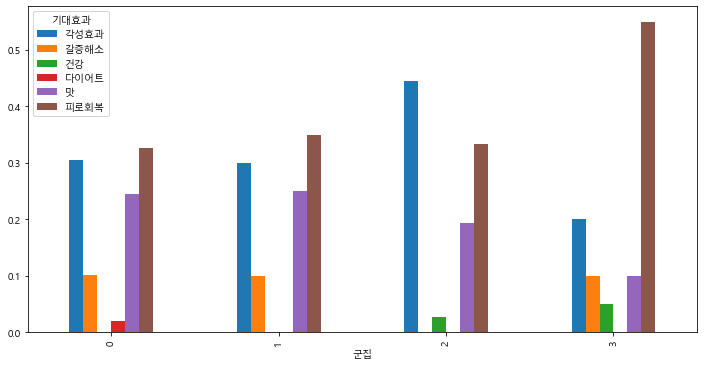


----- 우려요인 energy -----

군집
0    39
1    18
2    30
3    17
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

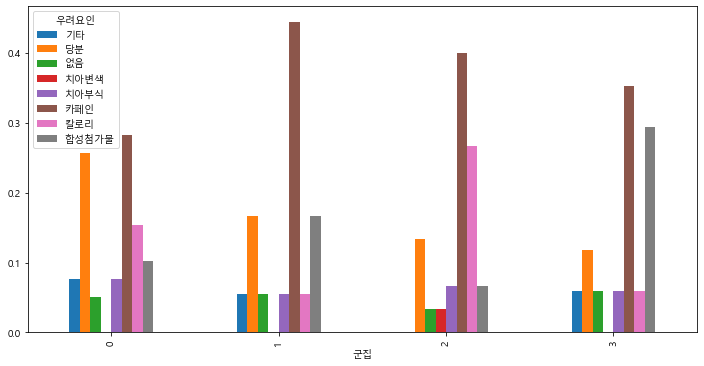


----- 구매장소 energy -----

군집
0    41
1    15
2    26
3    16
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

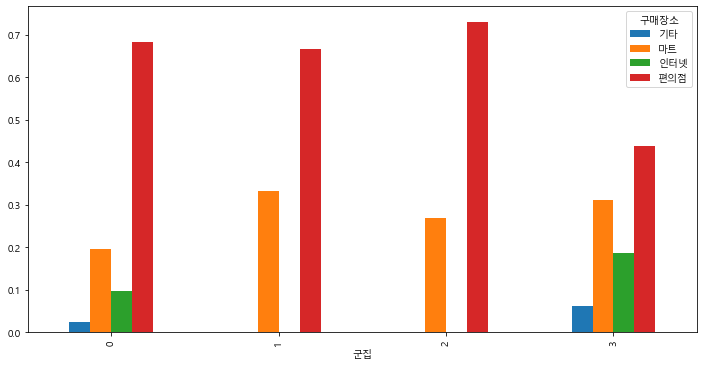


----- 함께음식 energy -----

군집
0    29
1    11
2    19
3    12
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

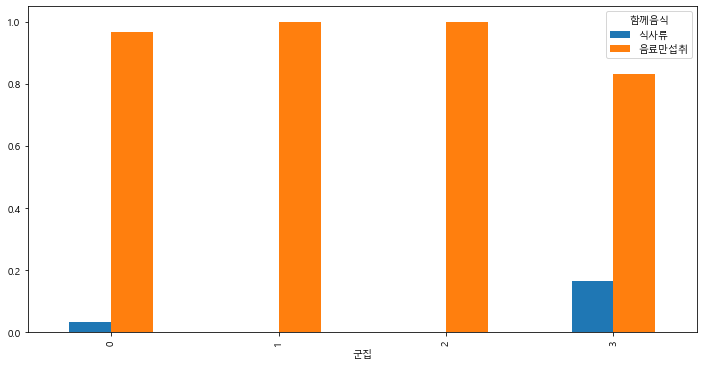


----- 구매사유 energy -----

군집
0    52
1    18
2    34
3    24
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

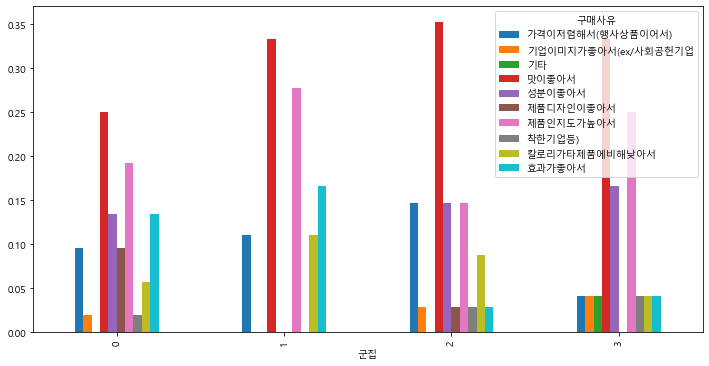


----- 횟수 ion -----

군집
0    49
1    31
2    28
3    24
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

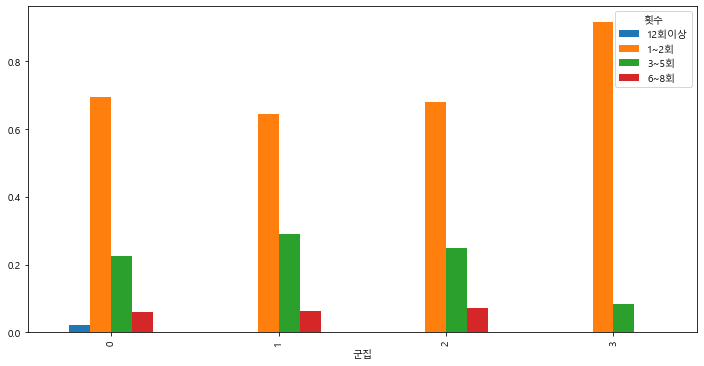


----- 상황 ion -----

군집
0    67
1    39
2    36
3    30
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

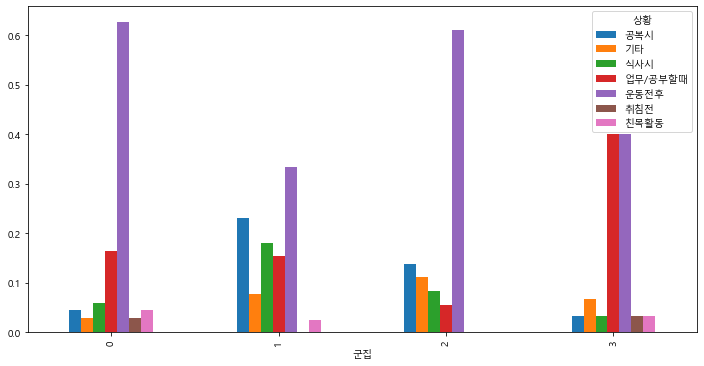


----- 기대효과 ion -----

군집
0    81
1    53
2    48
3    45
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

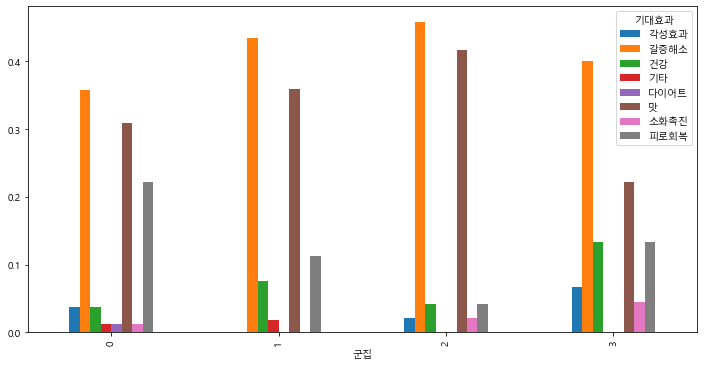


----- 우려요인 ion -----

군집
0    59
1    46
2    32
3    33
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

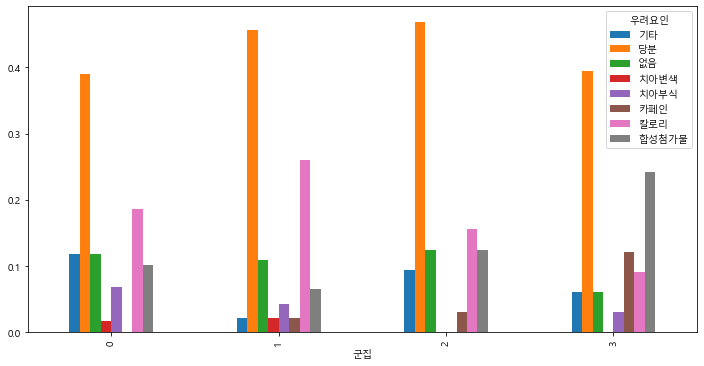


----- 구매장소 ion -----

군집
0    77
1    46
2    42
3    34
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

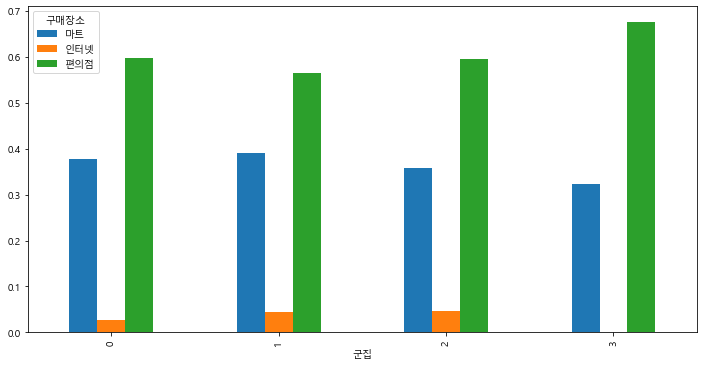


----- 함께음식 ion -----

군집
0    49
1    31
2    28
3    24
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

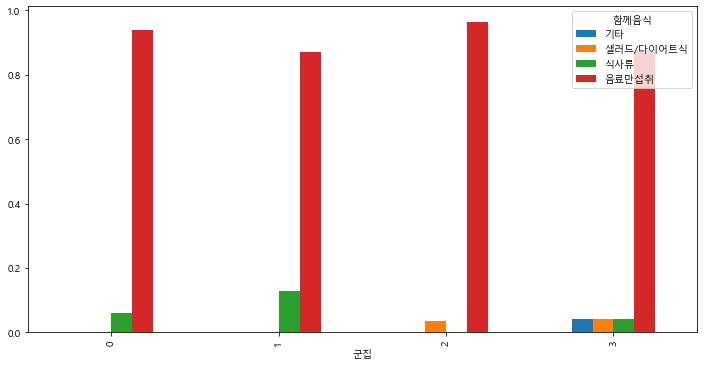


----- 구매사유 ion -----

군집
0    67
1    46
2    41
3    34
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

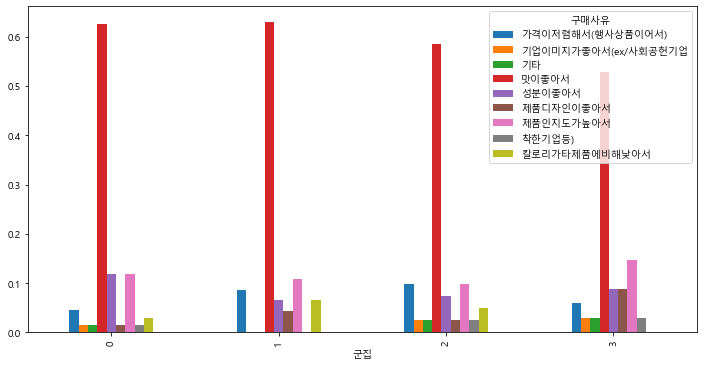


----- 횟수 water -----

군집
0    20
1    23
2    11
3    26
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

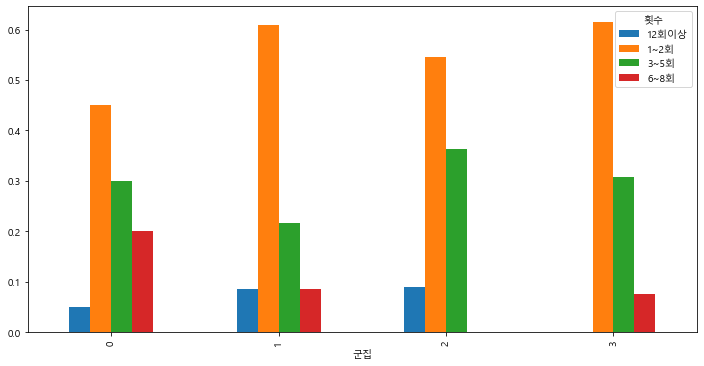


----- 상황 water -----

군집
0    28
1    31
2    16
3    33
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

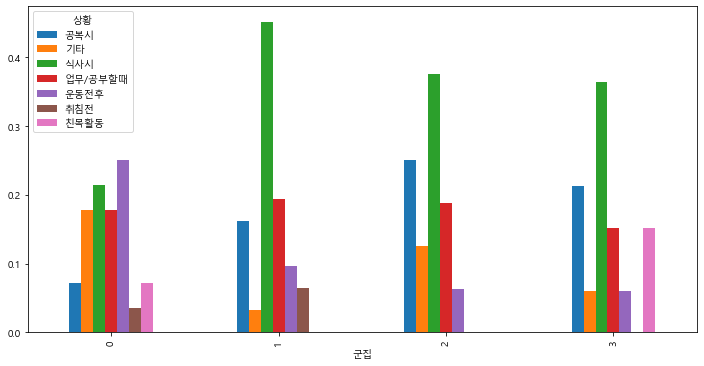


----- 기대효과 water -----

군집
0    29
1    42
2    17
3    36
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

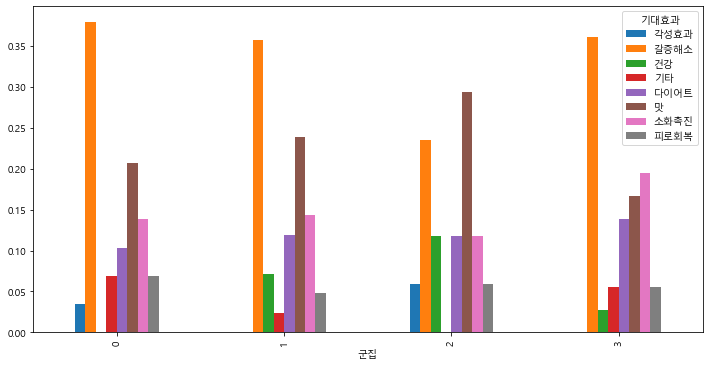


----- 우려요인 water -----

군집
0    24
1    23
2    13
3    30
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

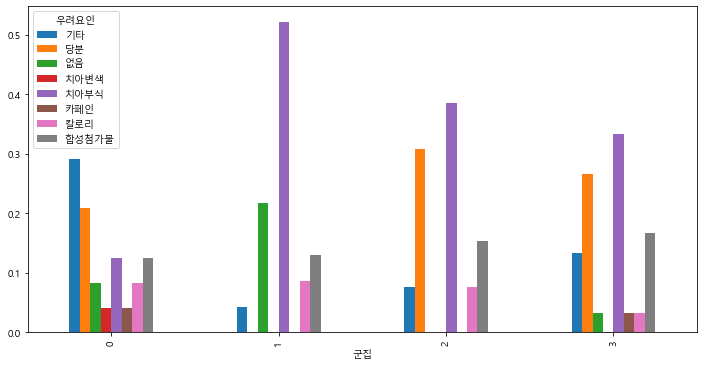


----- 구매장소 water -----

군집
0    32
1    34
2    17
3    35
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

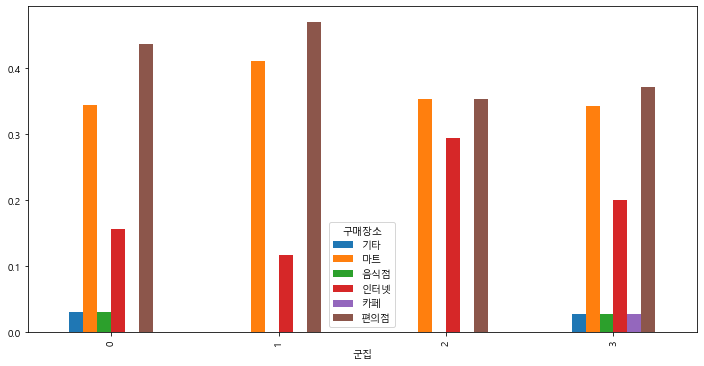


----- 함께음식 water -----

군집
0    20
1    23
2    11
3    26
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

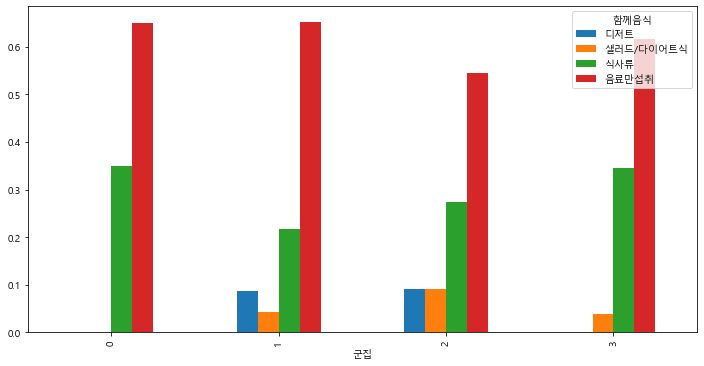


----- 구매사유 water -----

군집
0    25
1    29
2    16
3    37
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

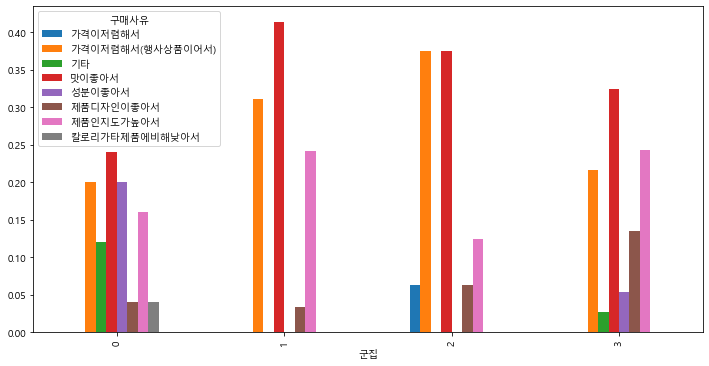


----- 횟수 juice -----

군집
0    33
1    39
2    17
3    36
Name: 횟수, dtype: int64


<AxesSubplot:xlabel='군집'>

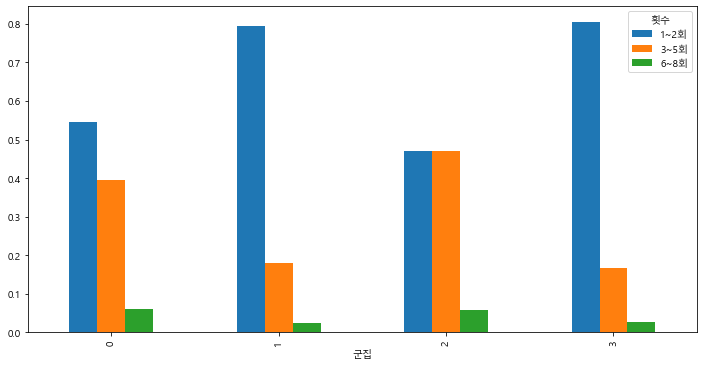


----- 상황 juice -----

군집
0    47
1    59
2    20
3    43
Name: 상황, dtype: int64


<AxesSubplot:xlabel='군집'>

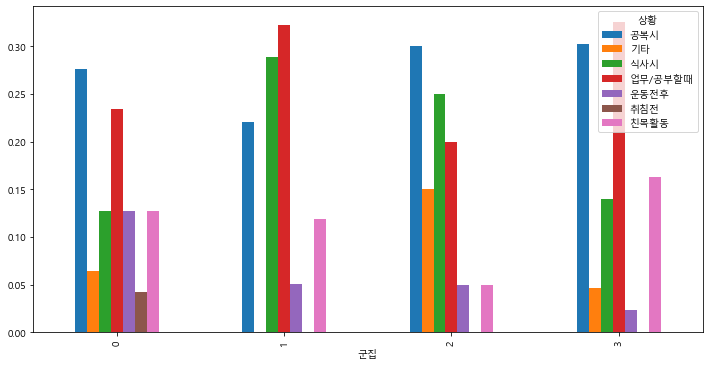


----- 기대효과 juice -----

군집
0    52
1    60
2    24
3    53
Name: 기대효과, dtype: int64


<AxesSubplot:xlabel='군집'>

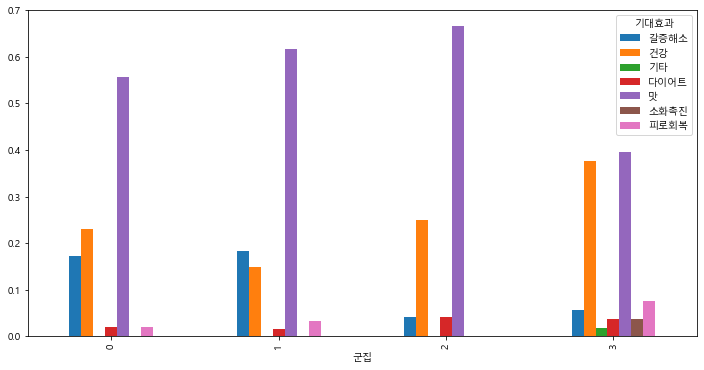


----- 우려요인 juice -----

군집
0    45
1    54
2    21
3    51
Name: 우려요인, dtype: int64


<AxesSubplot:xlabel='군집'>

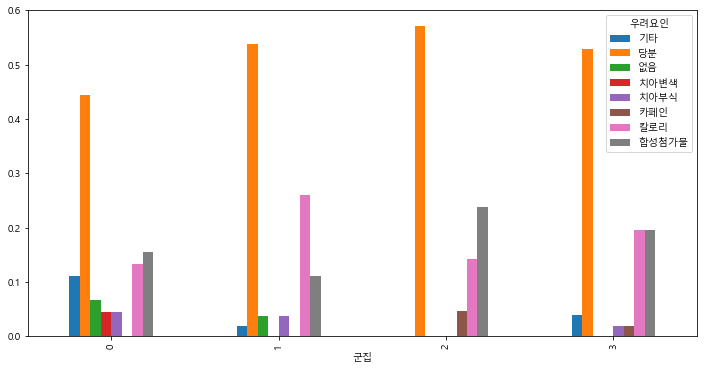


----- 구매장소 juice -----

군집
0    57
1    61
2    21
3    51
Name: 구매장소, dtype: int64


<AxesSubplot:xlabel='군집'>

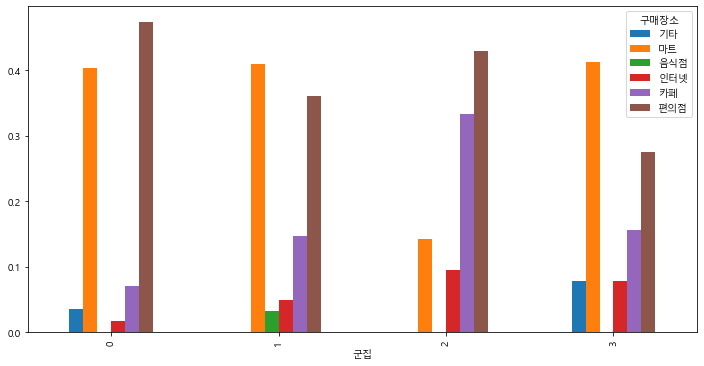


----- 함께음식 juice -----

군집
0    33
1    39
2    17
3    36
Name: 함께음식, dtype: int64


<AxesSubplot:xlabel='군집'>

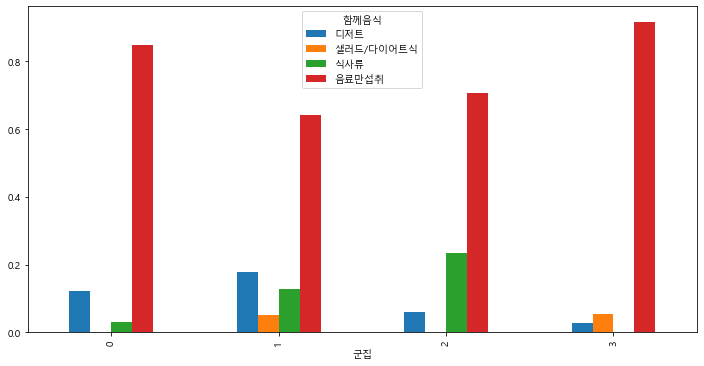


----- 구매사유 juice -----

군집
0    50
1    59
2    23
3    58
Name: 구매사유, dtype: int64


<AxesSubplot:xlabel='군집'>

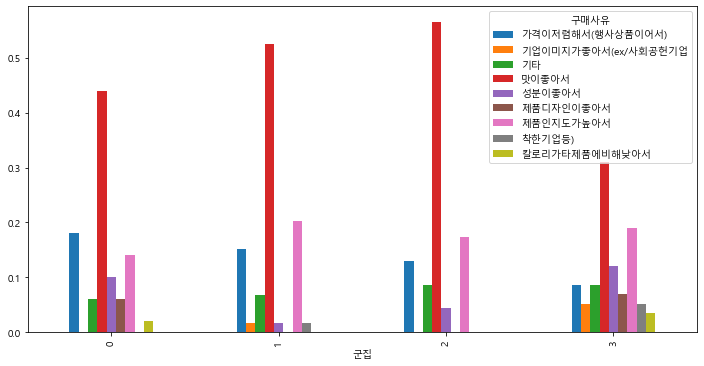

In [54]:
'''
복수응답을 전부 1개씩 slice했기 때문에, 중복응답이 되어서 데이터 왜곡이 일어났음. 이를 염두에 두고 테이블을 읽어야 함.
'''
for label in ['coffee','tea','soda','energy','ion','water','juice']:
    for info in [[0, '횟수'],[1,'상황'],[2,'기대효과'],[3,'우려요인'],[4,'구매장소'],[5,'함께음식'],[7,'구매사유']]:
        var_list = [8, info[0]]
        foo2 = correspondence_df.query('LABEL == @label')
        input_X = foo2[var_list]
        foo = pd.DataFrame(input_X.loc[:,info[0]].str.replace(' ','').str.split(',').tolist(), index = input_X.loc[:,8]).stack().reset_index().drop('level_1', axis = 1)
        foo.columns = ['군집',info[1]]
        print('-----',info[1],label,'-----')
        print('')
        print(foo.groupby('군집')[info[1]].count())
        display(percentage_pivot(foo, index = '군집', columns = info[1], aggfunc = len, fill_value = 0, values = None).plot(kind = 'bar', figsize = (12, 6)))
        plt.show()
        print('')

In [55]:
import prince

foo = pd.concat([df_info, cluster], axis = 1)

In [56]:
title = '선호음료 & 군집'
var_list = ['predict','Q6']
input_X = foo[var_list]
temp = pd.DataFrame(input_X['Q6'].str.replace(' ','').str.split(',').tolist(), index = input_X.predict).stack().reset_index().drop('level_1', axis = 1)
temp['predict'] = temp.predict.astype('str') # pred가 숫자라서 오류발생.

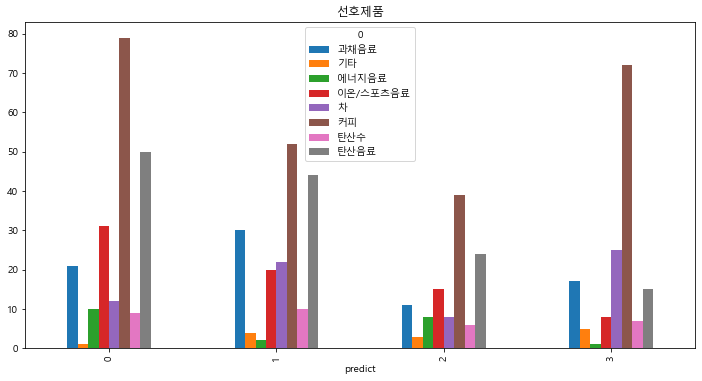

In [57]:
pd.pivot_table(temp, index = 'predict', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
plt.title('선호제품')
plt.show()

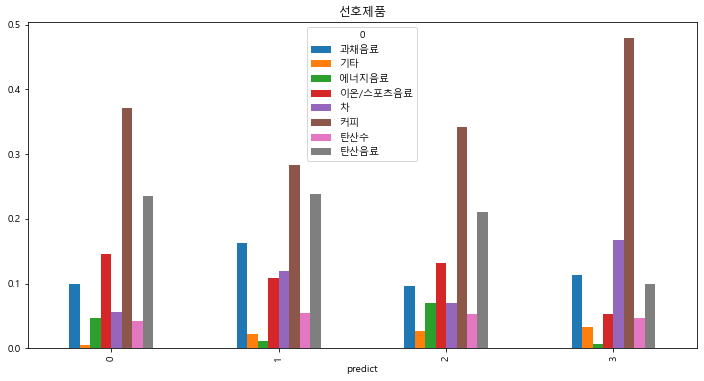

In [58]:
percentage_pivot(temp, index = 'predict', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
plt.title('선호제품')
plt.show()

In [59]:
mca = prince.MCA(n_components = 2).fit(temp)
ax = mca.plot_coordinates(X = temp, figsize = (15, 15), row_points_size = 0, column_points_size = 100, show_column_labels=True)
ax.set_title(title, fontsize = 24)

ValueError: array must not contain infs or NaNs

# ----------------------------

In [64]:
offline = pd.read_csv('힛더티 클린 오프라인 조사_수정1.csv', encoding = 'cp949')

In [65]:
column_info = offline.columns

offline.columns = ["Q"+str(i) for i in range(len(column_info))]

In [66]:
# 질문번호와 질문내용
for i, j in enumerate(column_info):
    print('Q'+str(i), j)

Q0 1. clean 첫인상 **사진첨부하기**
Q1 1-1. 이 음료를 원래 알고 계셨습니까?
Q2 2. 시음 후 소감
Q3 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [탄산음료]
Q4 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [에너지드링크]
Q5 4. 이 음료를 언제 마실 것 같으신가요?
Q6 5. 본 음료를 무엇과 함께 먹는다면, 무엇과 잘 어울릴 것 같으신가요? (복수응답)
Q7 6. 본 음료 시음 후 장점(긍정적)으로 느껴지는 부분이 있나요?
Q8 7. 시음 후 단점(부정적)으로 느껴지는 부분이 있나요?
Q9 8. 이 음료의 적정 가격이 얼마일 것 같으신가요? (100원 단위, 숫자만 작성)
Q10 9-1. 이 음료에 대한 호감도는 어떻게 되시나요?
Q11 9. 이 음료를 구매하실 의향이 있으신가요?
Q12 10-1. 연상 키워드 선택
Q13 10-2. 연상 키워드 선택
Q14 10-3. 연상 키워드 선택
Q15 10-4. 연상 키워드 선택
Q16 10-5. 연상 키워드 선택
Q17 10-6. 연상 키워드 선택
Q18 10-7. 연상 키워드 선택
Q19 10-8. 연상 키워드 선택
Q20 10-9. 연상 키워드 선택
Q21 11. 이 음료에서 가장 매력적으로 느껴지는 포인트는 무엇인가요?
Q22 11-1. 이 음료에 대한 호감도는 어떻게 되시나요? (정보제공 후)
Q23 12. 해당 음료의 가격은 2200원입니다. 가격이 적당하다고 생각하시나요?
Q24 13. 해당 음료의 적절한 가격이 얼마라고 생각하시나요? (숫자로만)
Q25 17. 성명
Q26 18. 나이
Q27 19. 직업
Q28 20. 성별
Q29 21. 취미(복수응답)
Q30 22. 선호 음료 (복수응답)
Q31 24. 평소 본인의 업무량(학업량)이 많다.
Q32 25. 건강에 대한 관심이 높다.
Q33 26. 주로 사용하는 SNS (복수응답)
Q34 27. 일 평균 SNS 이용 시간
Q35 29. Youtube에서 구독하거나

In [67]:
offline[['Q26','Q27','Q28','Q29','Q30','Q42','Q31','Q32']].head()

,Q26,Q27,Q28,Q29,Q30,Q42,Q31,Q32
0,20,학생,남,영상컨텐츠 시청(영화/넷플릭스/유튜브등),커피,3,3,3
1,22,학생,여,SNS,이온/스포츠음료,4,5,3
2,22,학생,여,SNS,커피,4,4,2
3,20,학생,여,"SNS,사교모임",과채음료,3,2,3
4,21,학생,여,"영상컨텐츠 시청(영화/넷플릭스/유튜브등),SNS,사교모임,음악감상/악기연주","과채음료,이온/스포츠음료",2,4,3


In [68]:
cluster_list = [0, 1, 2, 3]
offline_clusters = [0,1,1,1,1,2,0,1,1,2,1,0,0,2,1,0,0,0,0,1,1,1,2,0,1,0,0,0,2,3,1,2,0]

In [69]:
offline['cluster'] = offline_clusters

In [70]:
# cluster value counts
offline.cluster.value_counts()

1    13
0    13
2     6
3     1
Name: cluster, dtype: int64

In [71]:
# 3번군집 제거
offline = offline.drop(offline.query('cluster == 3').index)

In [72]:
# Q0 1. clean 첫인상
Q0_list = []
for cls in cluster_list:
    Q0_list.append(offline.query('cluster == @cls')['Q0'])

In [73]:
# Q2 2. 시음 후 소감
Q2_list = []
for cls in cluster_list:
    Q2_list.append(offline.query('cluster == @cls')['Q2'])

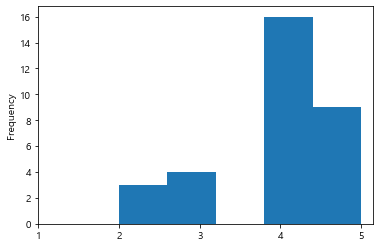

In [74]:
# Q3 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [탄산음료]
## 전체 분포
offline.Q3.plot.hist(bins = 5)
plt.xticks(range(1, 6))
plt.show()

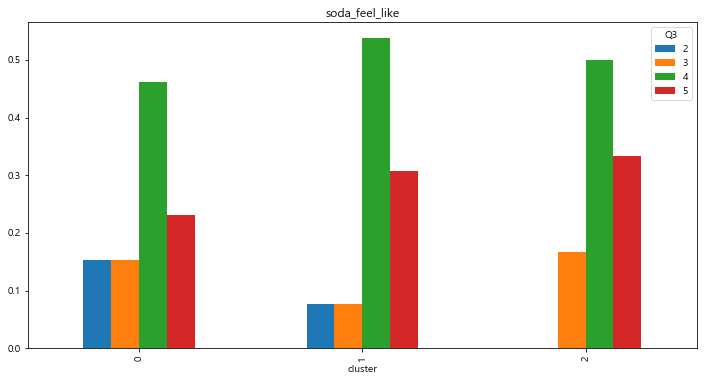

In [75]:
# Q3 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [탄산음료]
## 개별분포
### count
#pd.pivot_table(offline, index = 'cluster', columns = 'Q3', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

### percentage
percentage_pivot(offline, index = 'cluster', columns = 'Q3', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

plt.title('soda_feel_like')
plt.show()

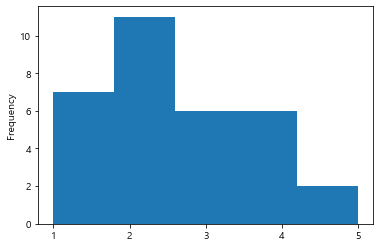

In [76]:
# Q4 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [에너지드링크]
## 전체 분포
offline.Q4.plot.hist(bins = 5)
plt.xticks(range(1, 6))
plt.show()

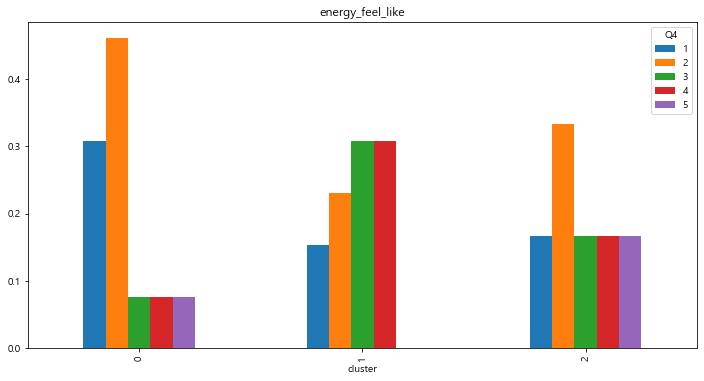

In [77]:
# Q4 3. 이 음료가 어떤 음료에 가깝게 느껴지시나요? (가깝게 느껴질수록 5) [에너지드링크]
## 개별분포
### count
#pd.pivot_table(offline, index = 'cluster', columns = 'Q4', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

### percentage
percentage_pivot(offline, index = 'cluster', columns = 'Q4', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

plt.title('energy_feel_like')
plt.show()

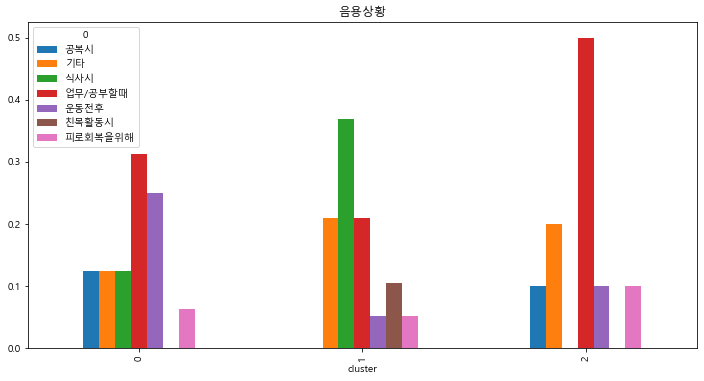

In [78]:
# Q5 4. 이 음료를 언제 마실 것 같으신가요?
## 기존 MCA맵에 겹쳐그리기?
var_list = ['cluster','Q5']
input_X = offline[var_list]
temp = pd.DataFrame(input_X['Q5'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)

# count
#pd.pivot_table(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
# percentage
percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
plt.title('음용상황')
plt.show()

In [79]:
'''# Q6 5. 본 음료를 무엇과 함께 먹는다면, 무엇과 잘 어울릴 것 같으신가요? (복수응답)
offline.Q6'''

'# Q6 5. 본 음료를 무엇과 함께 먹는다면, 무엇과 잘 어울릴 것 같으신가요? (복수응답)\noffline.Q6'

In [80]:
# Q7 6. 본 음료 시음 후 장점(긍정적)으로 느껴지는 부분이 있나요?
Q7_list = []

for cls in cluster_list:
    Q7_list.append(offline.query('cluster == @cls')['Q7'])

In [81]:
# Q8 7. 시음 후 단점(부정적)으로 느껴지는 부분이 있나요?
Q8_list = []

for cls in cluster_list:
    Q8_list.append(offline.query('cluster == @cls')['Q8'])

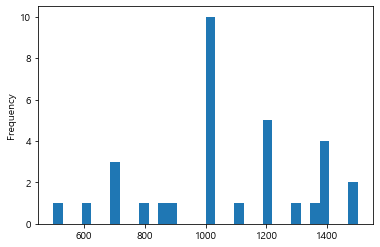

In [82]:
# Q9 8. 이 음료의 적정 가격이 얼마일 것 같으신가요? (100원 단위, 숫자만 작성)
## 전체 분포
offline.Q9.plot.hist(bins = offline.Q9.shape[0])
plt.show()

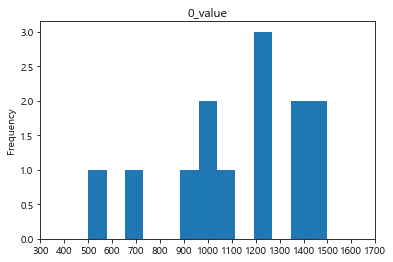

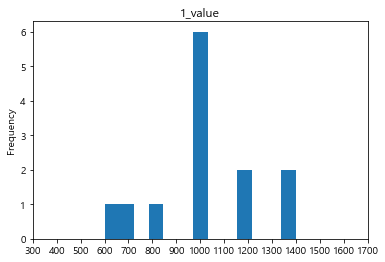

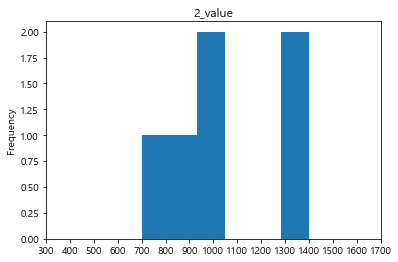

ValueError: `bins` must be positive, when an integer

In [83]:
# Q9 8. 이 음료의 적정 가격이 얼마일 것 같으신가요? (100원 단위, 숫자만 작성)
## 개별분포
for cls in cluster_list:
    offline.query('cluster == @cls').Q9.plot.hist(bins = offline.query('cluster == @cls').Q9.shape[0])
    plt.title(f'{cls}_value')
    plt.xticks(range(300, 1800, 100))
    plt.show()

In [ ]:
# Q10 9-1. 이 음료에 대한 호감도는 어떻게 되시나요?
## 전체분포
offline.Q10.plot.hist(bins = 5)
plt.xticks(range(1, 6))
plt.show()

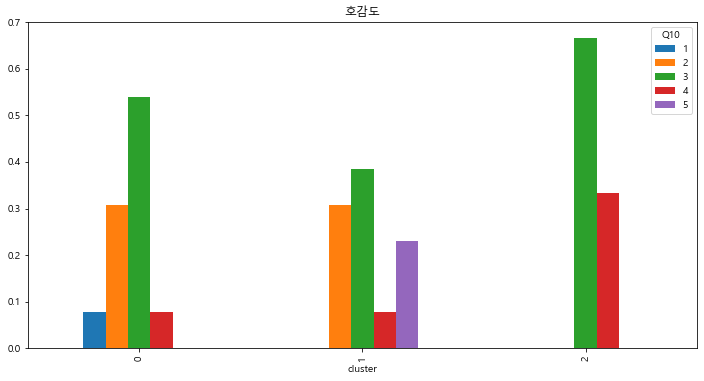

In [84]:
# Q10 9-1. 이 음료에 대한 호감도는 어떻게 되시나요?
## 개별분포
### count
#pd.pivot_table(offline, index = 'cluster', columns = 'Q10', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

### percentage
percentage_pivot(offline, index = 'cluster', columns = 'Q10', values = 'Q11', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

plt.title('호감도')
plt.show()

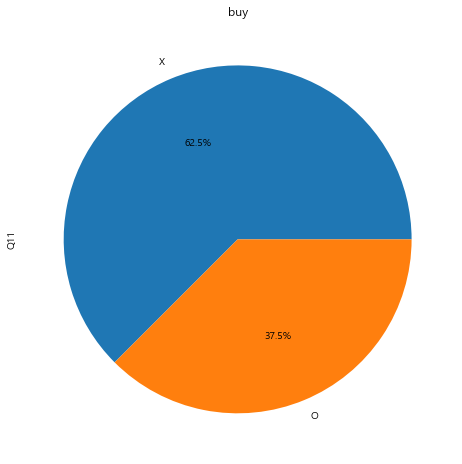

In [85]:
# Q11 9. 이 음료를 구매하실 의향이 있으신가요?
## 전체분포
offline.Q11.value_counts().plot.pie(figsize = (8, 8), autopct ='%1.1f%%')
plt.title('buy')
plt.show()

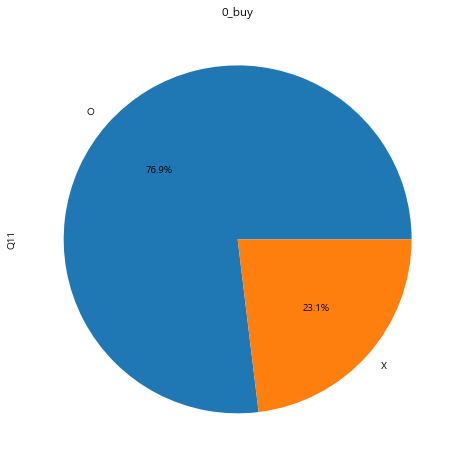

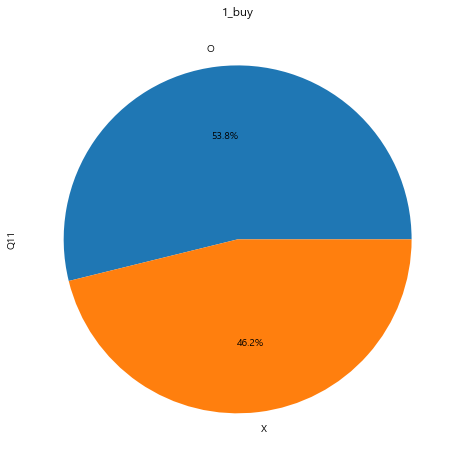

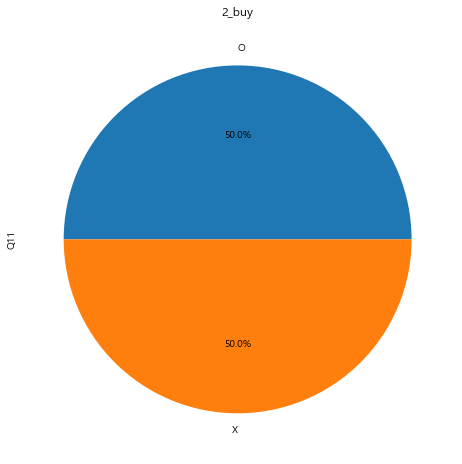

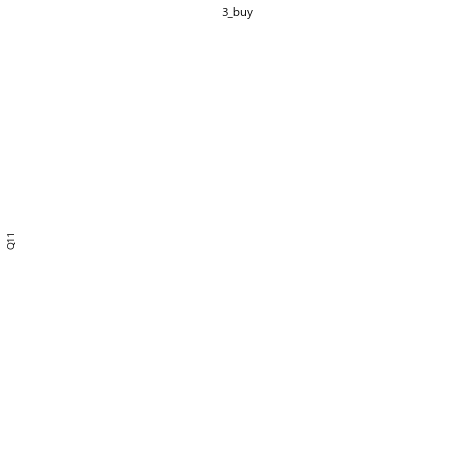

In [86]:
# Q11 9. 이 음료를 구매하실 의향이 있으신가요?
## 개별분포
for cls in cluster_list:
    offline.query('cluster == @cls').Q11.value_counts().plot.pie(figsize = (8, 8), autopct ='%1.1f%%', labels = ['O','X'])
    plt.title(f'{cls}_buy')
    plt.show()

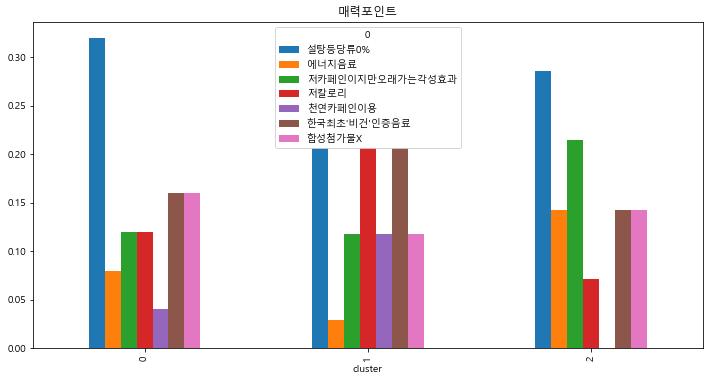

In [87]:
# Q21 11. 이 음료에서 가장 매력적으로 느껴지는 포인트는 무엇인가요?
## 개별분포
var_list = ['cluster','Q21']
input_X = offline[var_list]
temp = pd.DataFrame(input_X['Q21'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)

# count
#pd.pivot_table(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
# percentage
percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
plt.title('매력포인트')
plt.show()

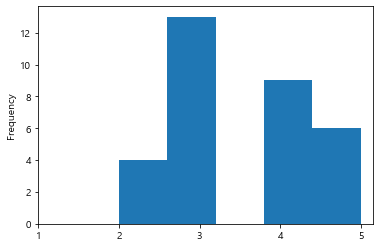

In [88]:
# Q22 11-1. 이 음료에 대한 호감도는 어떻게 되시나요? (정보제공 후)
## 전체분포
offline.Q22.plot.hist(bins = 5)
plt.xticks(range(1, 6))
plt.show()

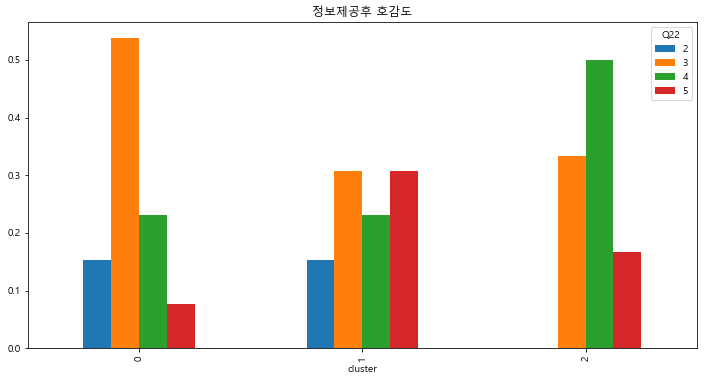

In [89]:
# Q22 11-1. 이 음료에 대한 호감도는 어떻게 되시나요? (정보제공 후)
## 개별분포
### count
#pd.pivot_table(offline, index = 'cluster', columns = 'Q22', values = 'Q10', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

### percentage
percentage_pivot(offline, index = 'cluster', columns = 'Q22', values = 'Q10', aggfunc = len).plot(kind = 'bar', figsize = (12, 6))

plt.title('정보제공후 호감도')
plt.show()

In [90]:
## 정보제공 이전 이후 호감도 차이 histogram

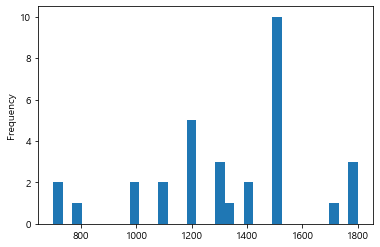

In [91]:
# Q24 13. 정보제공 후, 해당 음료의 적절한 가격이 얼마라고 생각하시나요? (숫자로만)
## 전체 분포
offline.Q24.plot.hist(bins = offline.Q24.shape[0])
plt.show()

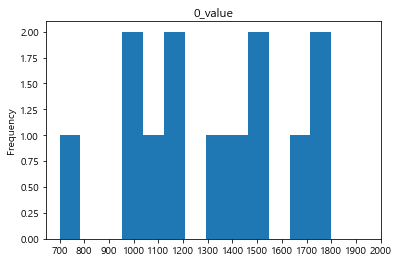

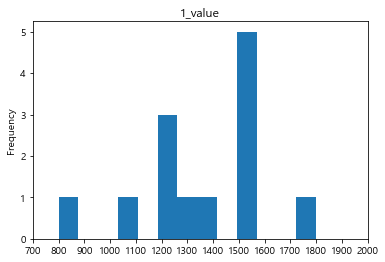

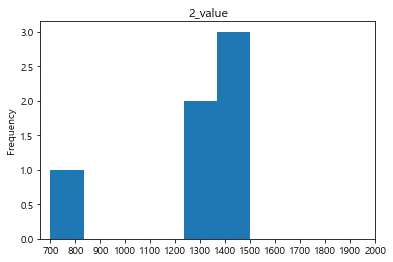

ValueError: `bins` must be positive, when an integer

In [92]:
# Q24 13. 정보제공 후, 해당 음료의 적절한 가격이 얼마라고 생각하시나요? (숫자로만)
## 개별분포
for cls in cluster_list:
    offline.query('cluster == @cls').Q24.plot.hist(bins = offline.query('cluster == @cls').Q24.shape[0])
    plt.title(f'{cls}_value')
    plt.xticks(range(700, 2100, 100))
    plt.show()

In [ ]:
sns.kdeplot(data = offline, x = 'Q24', hue ='cluster')

# ---------------군집별 인구통계특성 추가

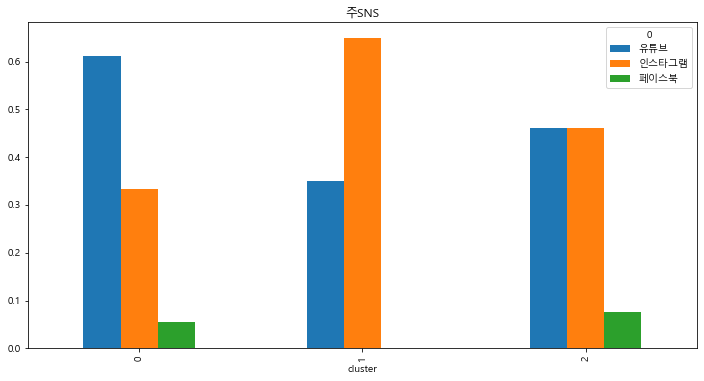

In [93]:
# Q33 26. 주로 사용하는 SNS (복수응답)

var_list = ['cluster','Q33']
input_X = offline[var_list]
temp = pd.DataFrame(input_X['Q33'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)
percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).plot(kind = 'bar', figsize = (12, 6))
plt.title('주SNS')
plt.show()

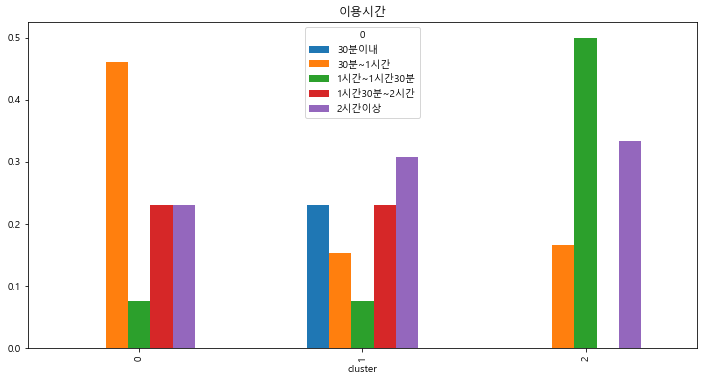

In [94]:
# Q34 27. 일 평균 SNS 이용 시간

var_list = ['cluster','Q34']
input_X = offline[var_list]
temp = pd.DataFrame(input_X['Q34'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)
kk = percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None)
kk = kk[['30분이내','30분~1시간','1시간~1시간30분','1시간30분~2시간','2시간이상']]
kk.plot(kind = 'bar', figsize = (12, 6))
plt.title('이용시간')
plt.show()

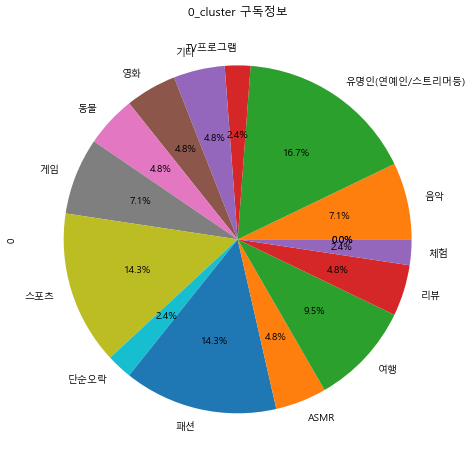

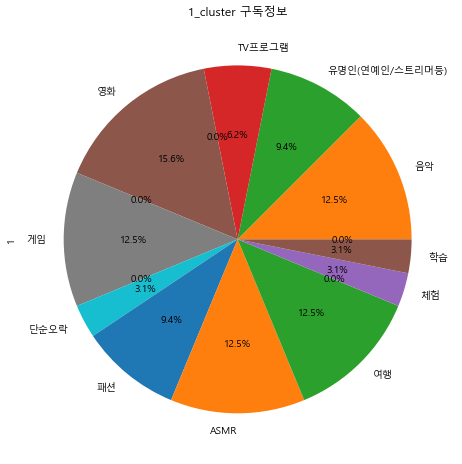

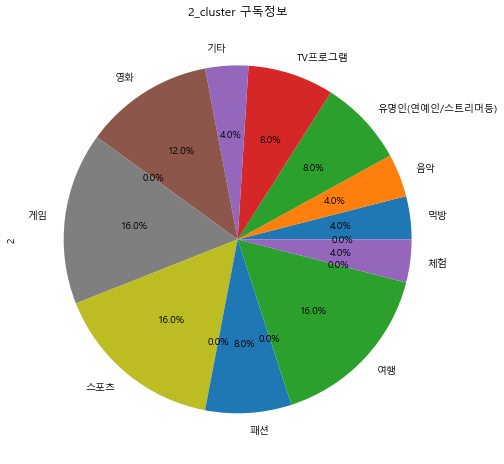

In [95]:
# Q35 29. Youtube에서 구독하거나, 주로 시청하는 컨텐츠 (복수응답)

var_list = ['cluster','Q35']
input_X = offline[var_list]
temp = pd.DataFrame(input_X['Q35'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)
q35_unique = temp[0].unique()
for i in range(3):
    percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).loc[i, :].plot.pie(figsize = (8, 8), autopct = "%1.1f%%", labels = q35_unique)
    plt.title(f"{i}_cluster 구독정보")
    plt.show()

In [103]:
round(percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, fill_value = 0, values = None)* 100, 2)

,ASMR,TV프로그램,게임,기타,단순오락,동물,리뷰,먹방,스포츠,여행,영화,유명인(연예인/스트리머등),음악,체험,패션,학습
cluster,,,,,,,,,,,,,,,,
0,0.0,7.14,16.67,2.38,4.76,4.76,4.76,7.14,14.29,2.38,14.29,4.76,9.52,4.76,2.38,0.00
1,0.0,12.50,9.38,6.25,0.00,15.62,0.00,12.50,0.00,3.12,9.38,12.50,12.50,0.00,3.12,3.12
2,4.0,4.00,8.00,8.00,4.00,12.00,0.00,16.00,16.00,0.00,8.00,0.00,16.00,0.00,4.00,0.00


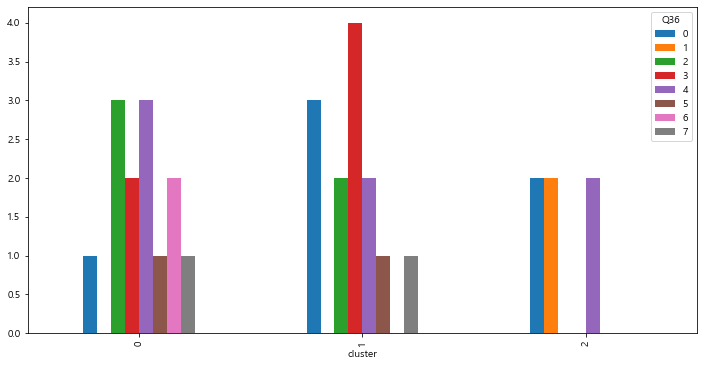

In [95]:
# Q36 30. 귀하께서는 일주일에 몇 회 정도 운동을 하십니까?
## count
pd.pivot_table(offline, index = 'cluster', columns = 'Q36', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
## percentage
#percentage_pivot(offline, index = 'cluster', columns = 'Q36', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))

plt.show()

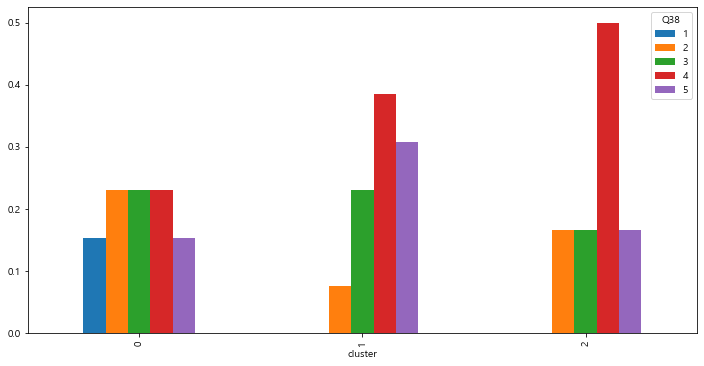

In [96]:
# Q38 32. 평소 다이어트에 대해 관심이 많으십니까?

#pd.pivot_table(offline, index = 'cluster', columns = 'Q38', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
percentage_pivot(offline, index = 'cluster', columns = 'Q38', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))

plt.show()

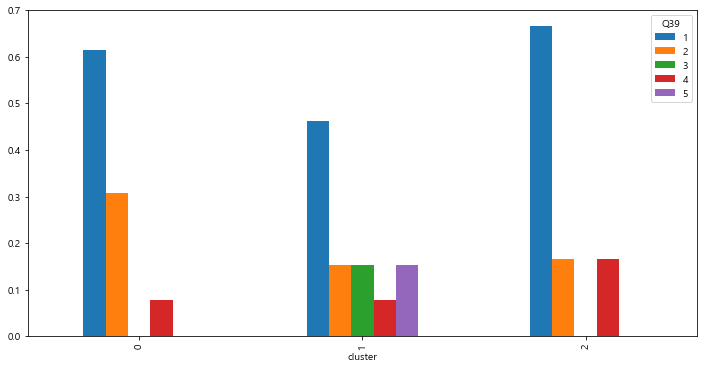

In [97]:
# Q39 33. 평소 비건(채식주의)에 관심이있으십니까?

#pd.pivot_table(offline, index = 'cluster', columns = 'Q39', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
percentage_pivot(offline, index = 'cluster', columns = 'Q39', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))

plt.show()

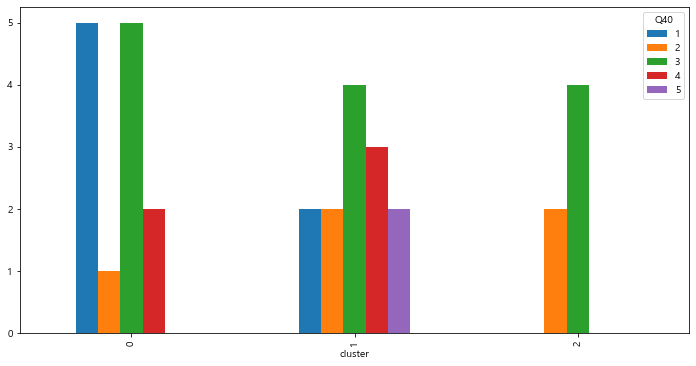

In [98]:
# Q40 35. 응답자께서는 평소 트렌드에 민감하게 반응하십니까?

pd.pivot_table(offline, index = 'cluster', columns = 'Q40', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))
#percentage_pivot(offline, index = 'cluster', columns = 'Q40', values = 'Q11', aggfunc = len, fill_value = 0).plot(kind = 'bar', figsize = (12, 6))

plt.show()

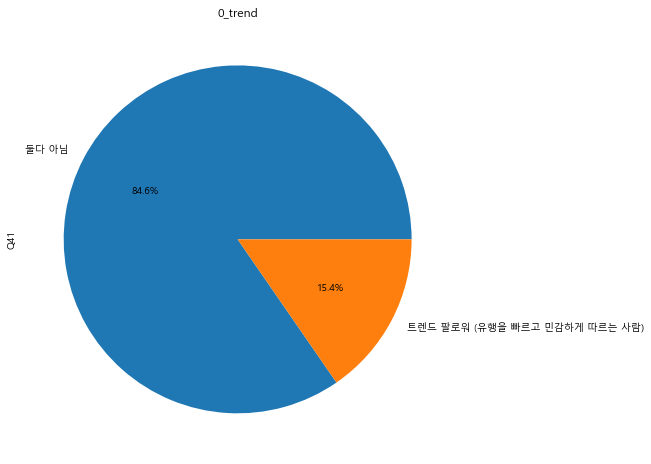

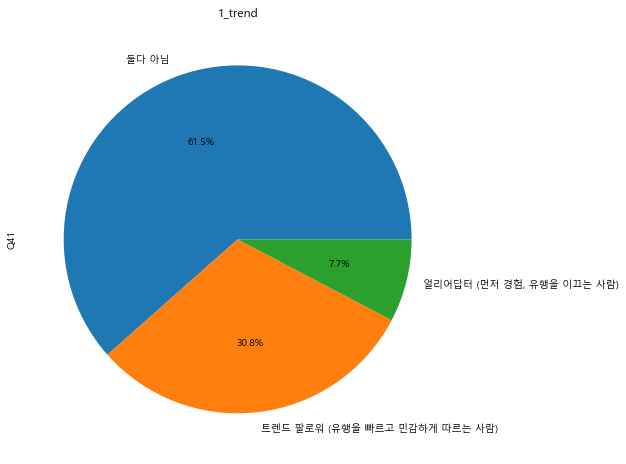

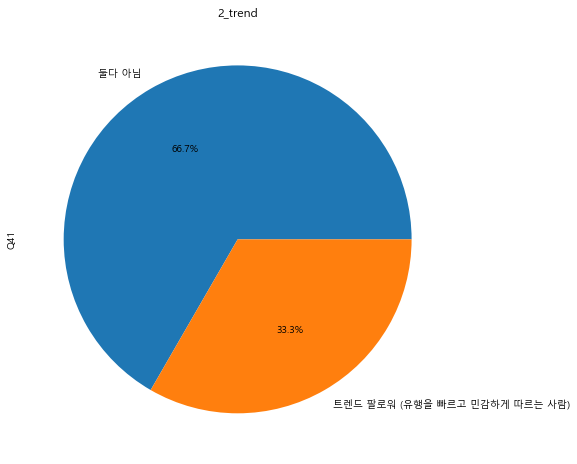

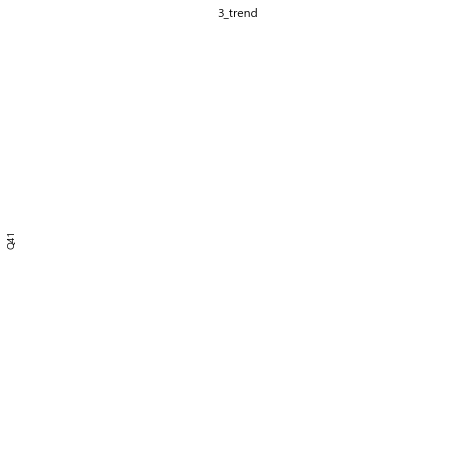

In [99]:
# Q41 36. 응답자께서는 아래 유형중 어디에 속한다고 생각하십니까?

for cls in cluster_list:
    offline.query('cluster == @cls').Q41.value_counts().plot.pie(figsize = (8, 8), autopct ='%1.1f%%')
    plt.title(f'{cls}_trend')
    plt.show()    

In [100]:
# 군집별 주중 음료 구매 횟수 평균, 표준편차
p1 = offline.groupby('cluster')['Q43'].agg([('음료평균','mean'),('음료편차','std')])

In [101]:
# 군집별 탄산음료 음용 횟수 평균, 표준편차
p2 = offline.groupby('cluster')['Q44'].agg([('탄산평균','mean'),('탄산편차','std')])

In [102]:
# 군집별 에너지드링크 음용 횟수 평균, 표준편차
p3 = offline.groupby('cluster')['Q46'].agg([('에너지평균','mean'),('에너지편차','std')])

In [103]:
pp = pd.concat([p1, p2, p3], axis = 1)
pp = pp.fillna(0)
pp['탄산/음료'] = pp['탄산평균'] / pp['음료평균']
pp['에너지/음료'] = pp['에너지평균'] / pp['음료평균']
pp

,음료평균,음료편차,탄산평균,탄산편차,에너지평균,에너지편차,탄산/음료,에너지/음료
cluster,,,,,,,,
0,6.769231,3.609105,3.153846,2.640901,0.230769,0.832050,0.465909,0.034091
1,5.076923,3.121472,1.461538,1.391365,0.769231,1.535895,0.287879,0.151515
2,5.333333,3.386247,2.500000,1.974842,1.000000,1.549193,0.468750,0.187500


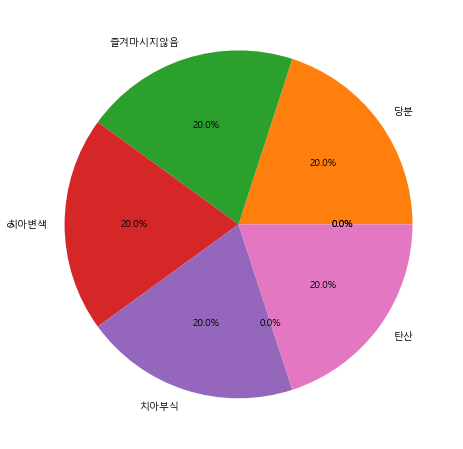

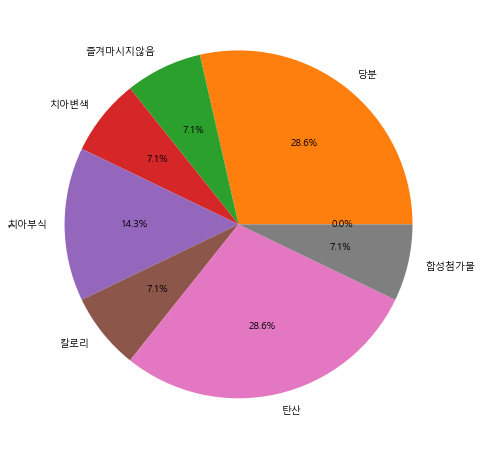

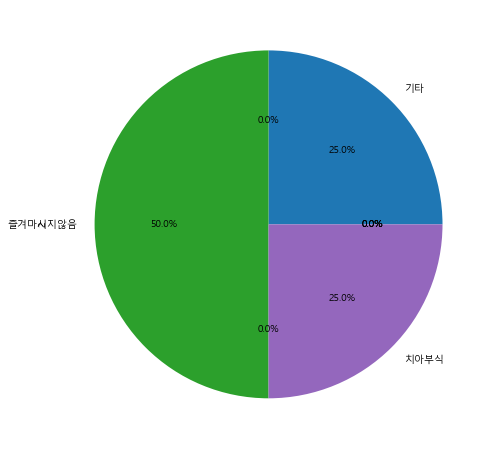

In [105]:
# 탄산음료를 마시지 않는 이유
var_list = ['cluster','Q45']
input_X = offline[var_list]
input_X = input_X.dropna()
temp = pd.DataFrame(input_X['Q45'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)
for i in range(3):
    percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).loc[i, :].plot.pie(figsize = (8, 8), autopct = "%1.1f%%")
    plt.show()

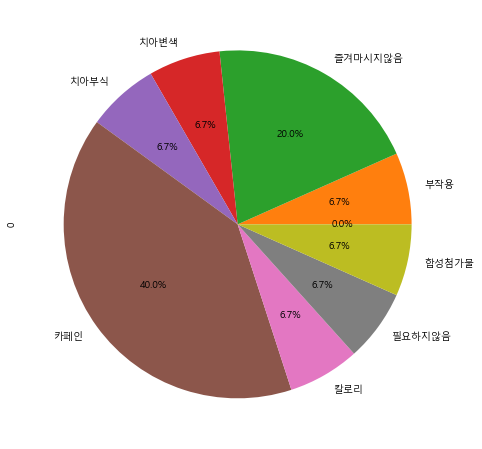

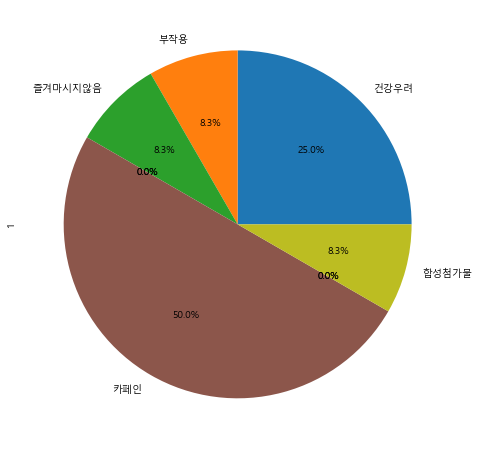

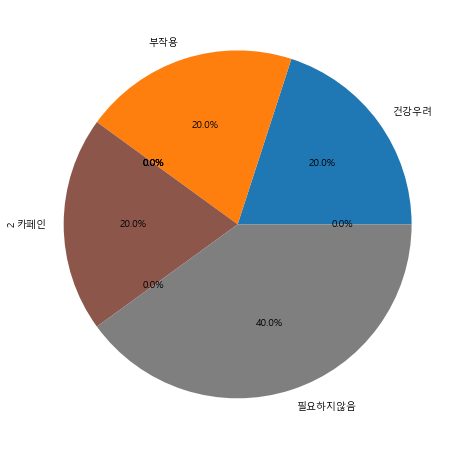

In [106]:
# 에너지드링크 마시지 않는 이유
var_list = ['cluster','Q47']
input_X = offline[var_list]
input_X = input_X.dropna()
temp = pd.DataFrame(input_X['Q47'].str.replace(' ','').str.split(',').tolist(), index = input_X.cluster).stack().reset_index().drop('level_1', axis = 1)
for i in range(3):
    percentage_pivot(temp, index = 'cluster', columns = 0, aggfunc = len, values = None).loc[i, :].plot.pie(figsize = (8, 8), autopct = "%1.1f%%")
    plt.show()